<a href="https://colab.research.google.com/github/SethupathyM/Supervised-ML---Regression/blob/main/Bike_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly as plot

pd.set_option('display.max_columns', 20)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,auc
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import math


In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/My_drive')

Mounted at /content/My_drive


In [3]:
# Loading the file
df = pd.read_csv('/content/My_drive/MyDrive/Capstone_Project_Supervised_ML_Bike_Demand_Prediction/Copy of SeoulBikeData.csv',encoding= 'unicode_escape')

In [4]:
# Shape
df.shape

(8760, 14)

In [5]:
# Head
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Tail
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
# Duplicates
df.duplicated().sum()

0

In [8]:
# Null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
# Summary
df.describe([0.95,0.98,0.99])

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
95%,2043.000000,22.000000,30.700000,94.000000,3.700000,2000.000000,22.405000,2.560000,0.400000,0.200000
98%,2355.000000,23.000000,33.600000,97.000000,4.300000,2000.000000,23.900000,2.960000,2.000000,1.300000
99%,2526.230000,23.000000,35.100000,97.000000,4.700000,2000.000000,24.700000,3.170000,4.000000,2.500000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [11]:
# Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
# Numerical variables
df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [13]:
# Categorical variables
columns = df.columns.tolist()
numerical_variables = df.describe().columns.tolist()

categorical_variables = [var for var in columns]
for var in columns:
  if var in numerical_variables:
    categorical_variables.remove(var)
categorical_variables

['Date', 'Seasons', 'Holiday', 'Functioning Day']

In [14]:
# Removing date column
df.drop('Date',axis = 1,inplace = True)

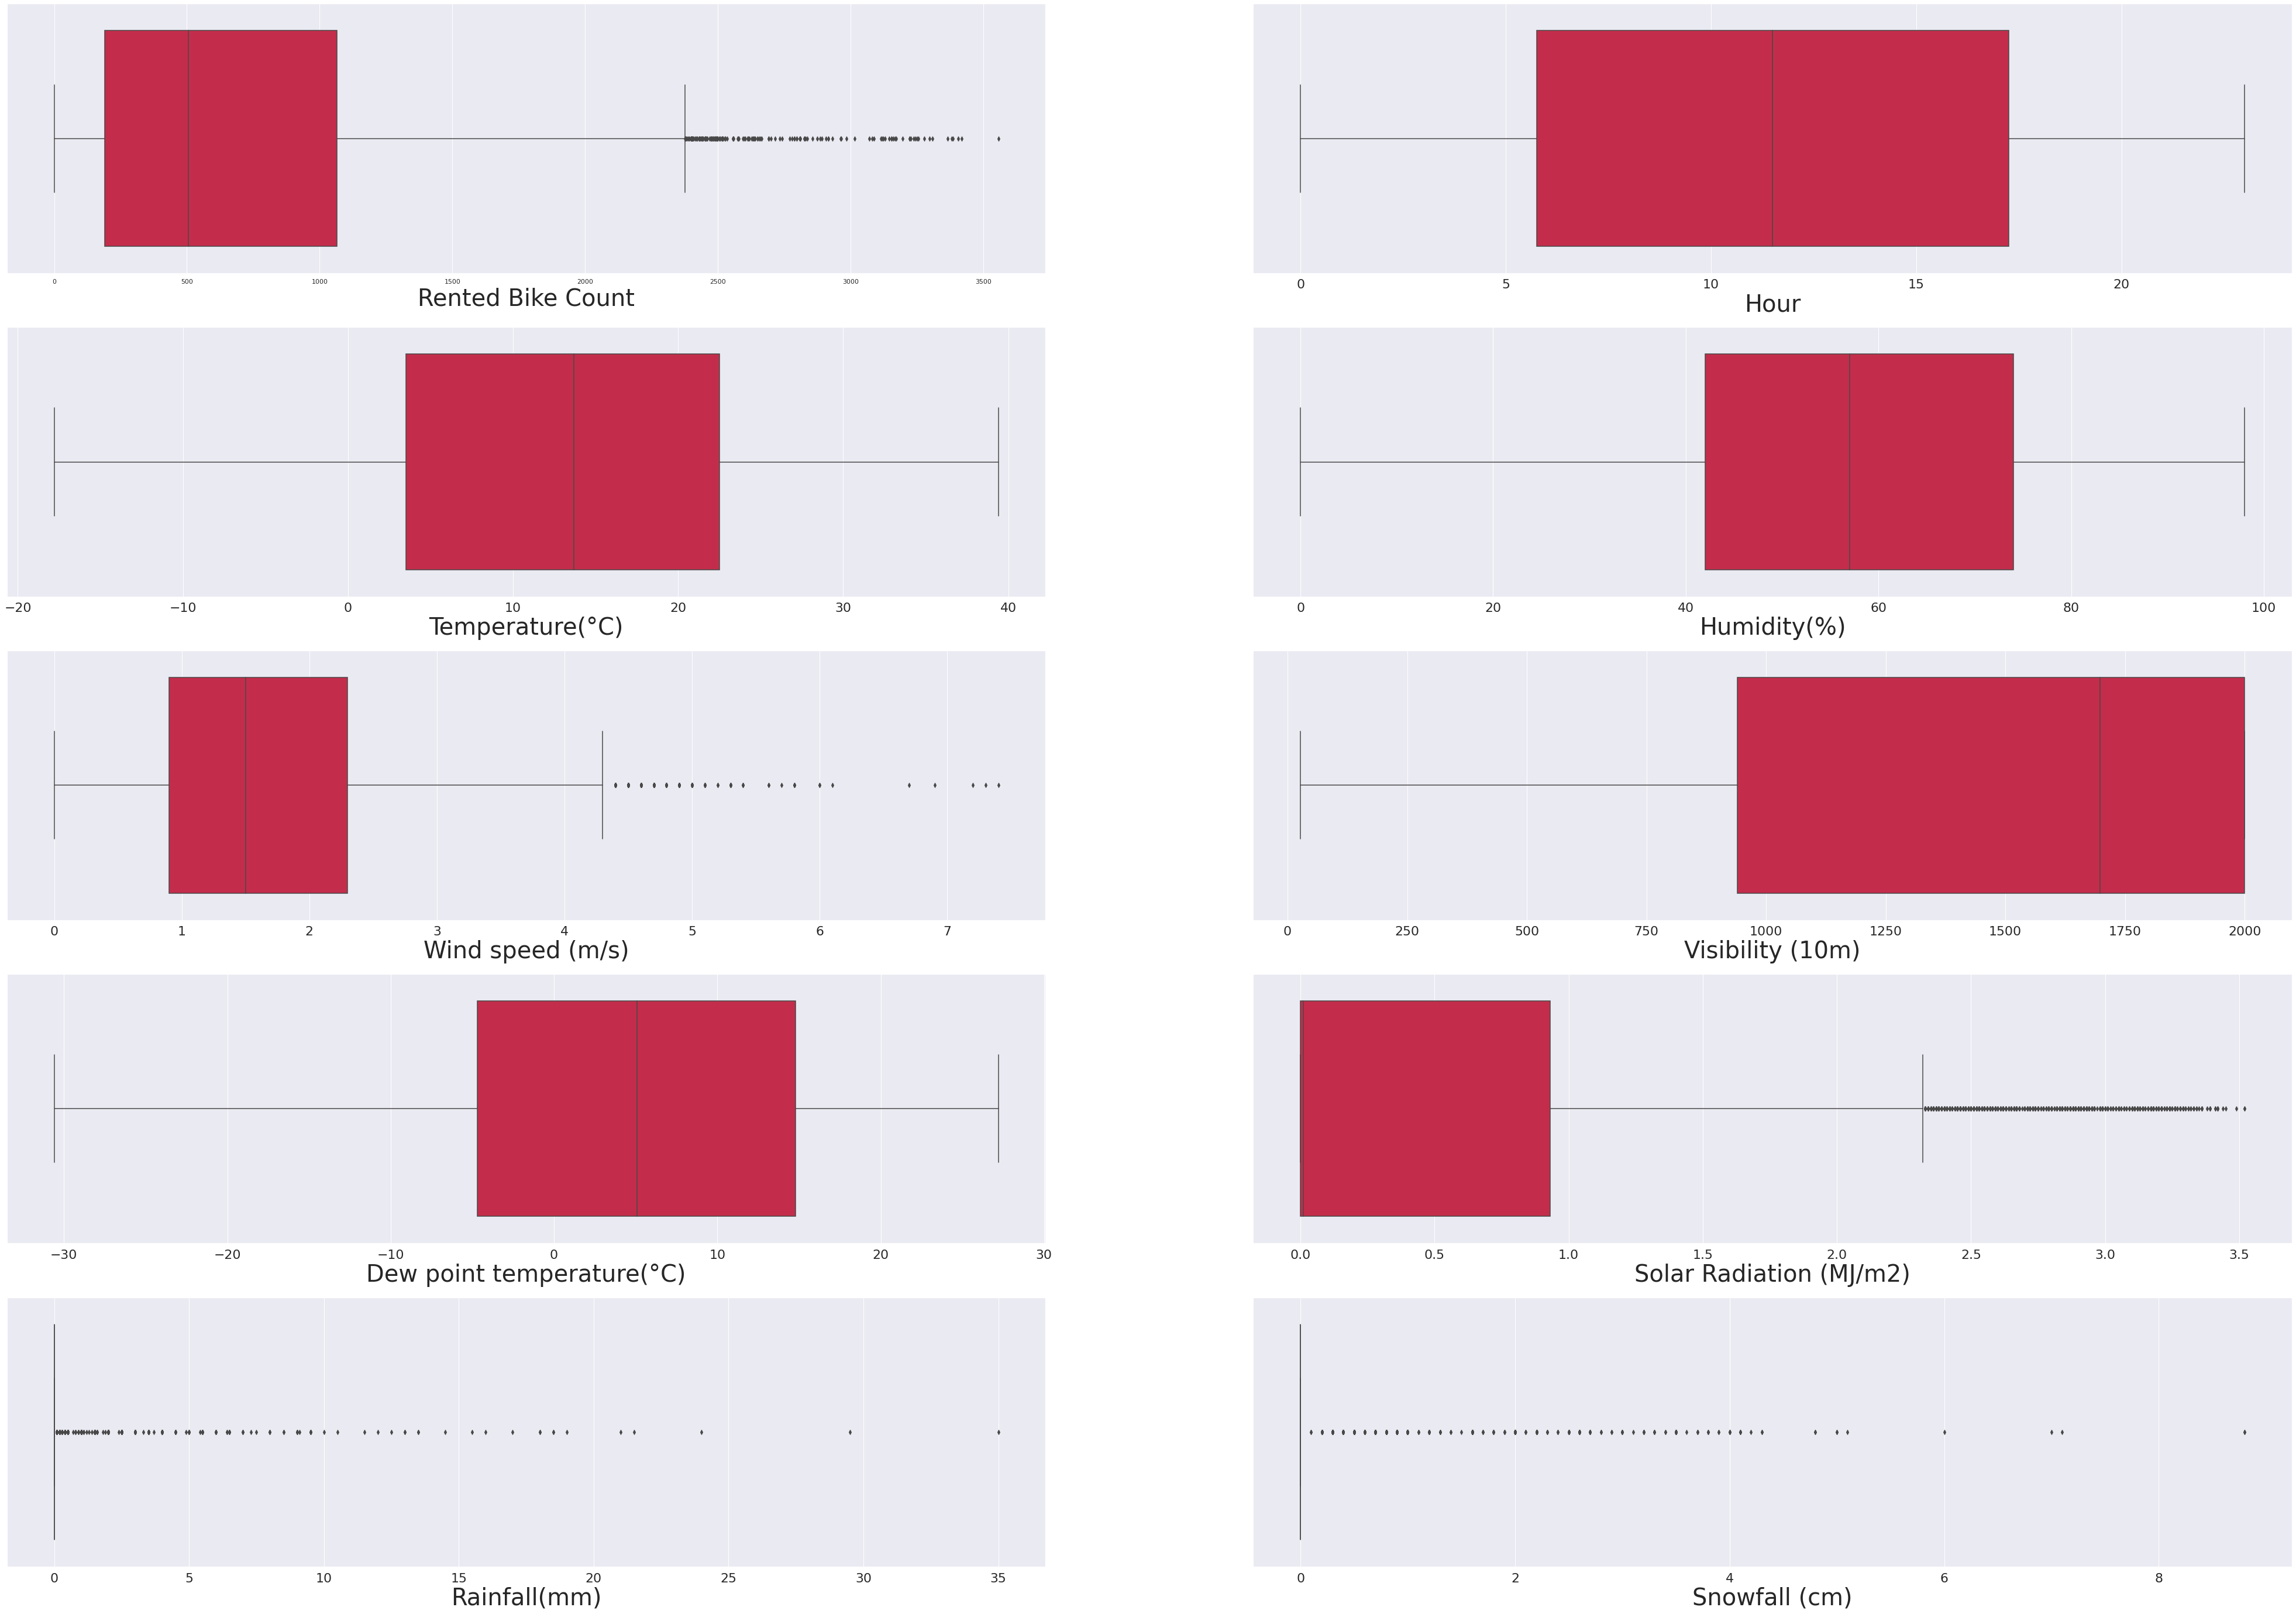

In [15]:
# Box plot to detect outliers
lst_box = numerical_variables
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
    plt.subplot(10, 2,i[0]+1)
    sns.set(font_scale = 2)
    sns.boxplot(df[i[1]],color='crimson')
    plt.xlabel(i[1],fontsize=40)

In [16]:
# Z Score based technique to remove outliers
lst = ['Rented Bike Count','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)']
for i in lst:
  lower_limit = df[i].mean() - 3*df[i].std()
  print(i+'Lower_limit:',round(lower_limit,2))  
  upper_limit = df[i].mean() + 3*df[i].std()
  print(i+'Upper_limit:',round(upper_limit,2))
  df[i] = np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))

Rented Bike CountLower_limit: -1230.39
Rented Bike CountUpper_limit: 2639.59
Temperature(°C)Lower_limit: -22.95
Temperature(°C)Upper_limit: 48.72
Humidity(%)Lower_limit: -2.86
Humidity(%)Upper_limit: 119.31
Wind speed (m/s)Lower_limit: -1.38
Wind speed (m/s)Upper_limit: 4.83
Visibility (10m)Lower_limit: -388.07
Visibility (10m)Upper_limit: 3261.72
Dew point temperature(°C)Lower_limit: -35.11
Dew point temperature(°C)Upper_limit: 43.25
Solar Radiation (MJ/m2)Lower_limit: -2.04
Solar Radiation (MJ/m2)Upper_limit: 3.18


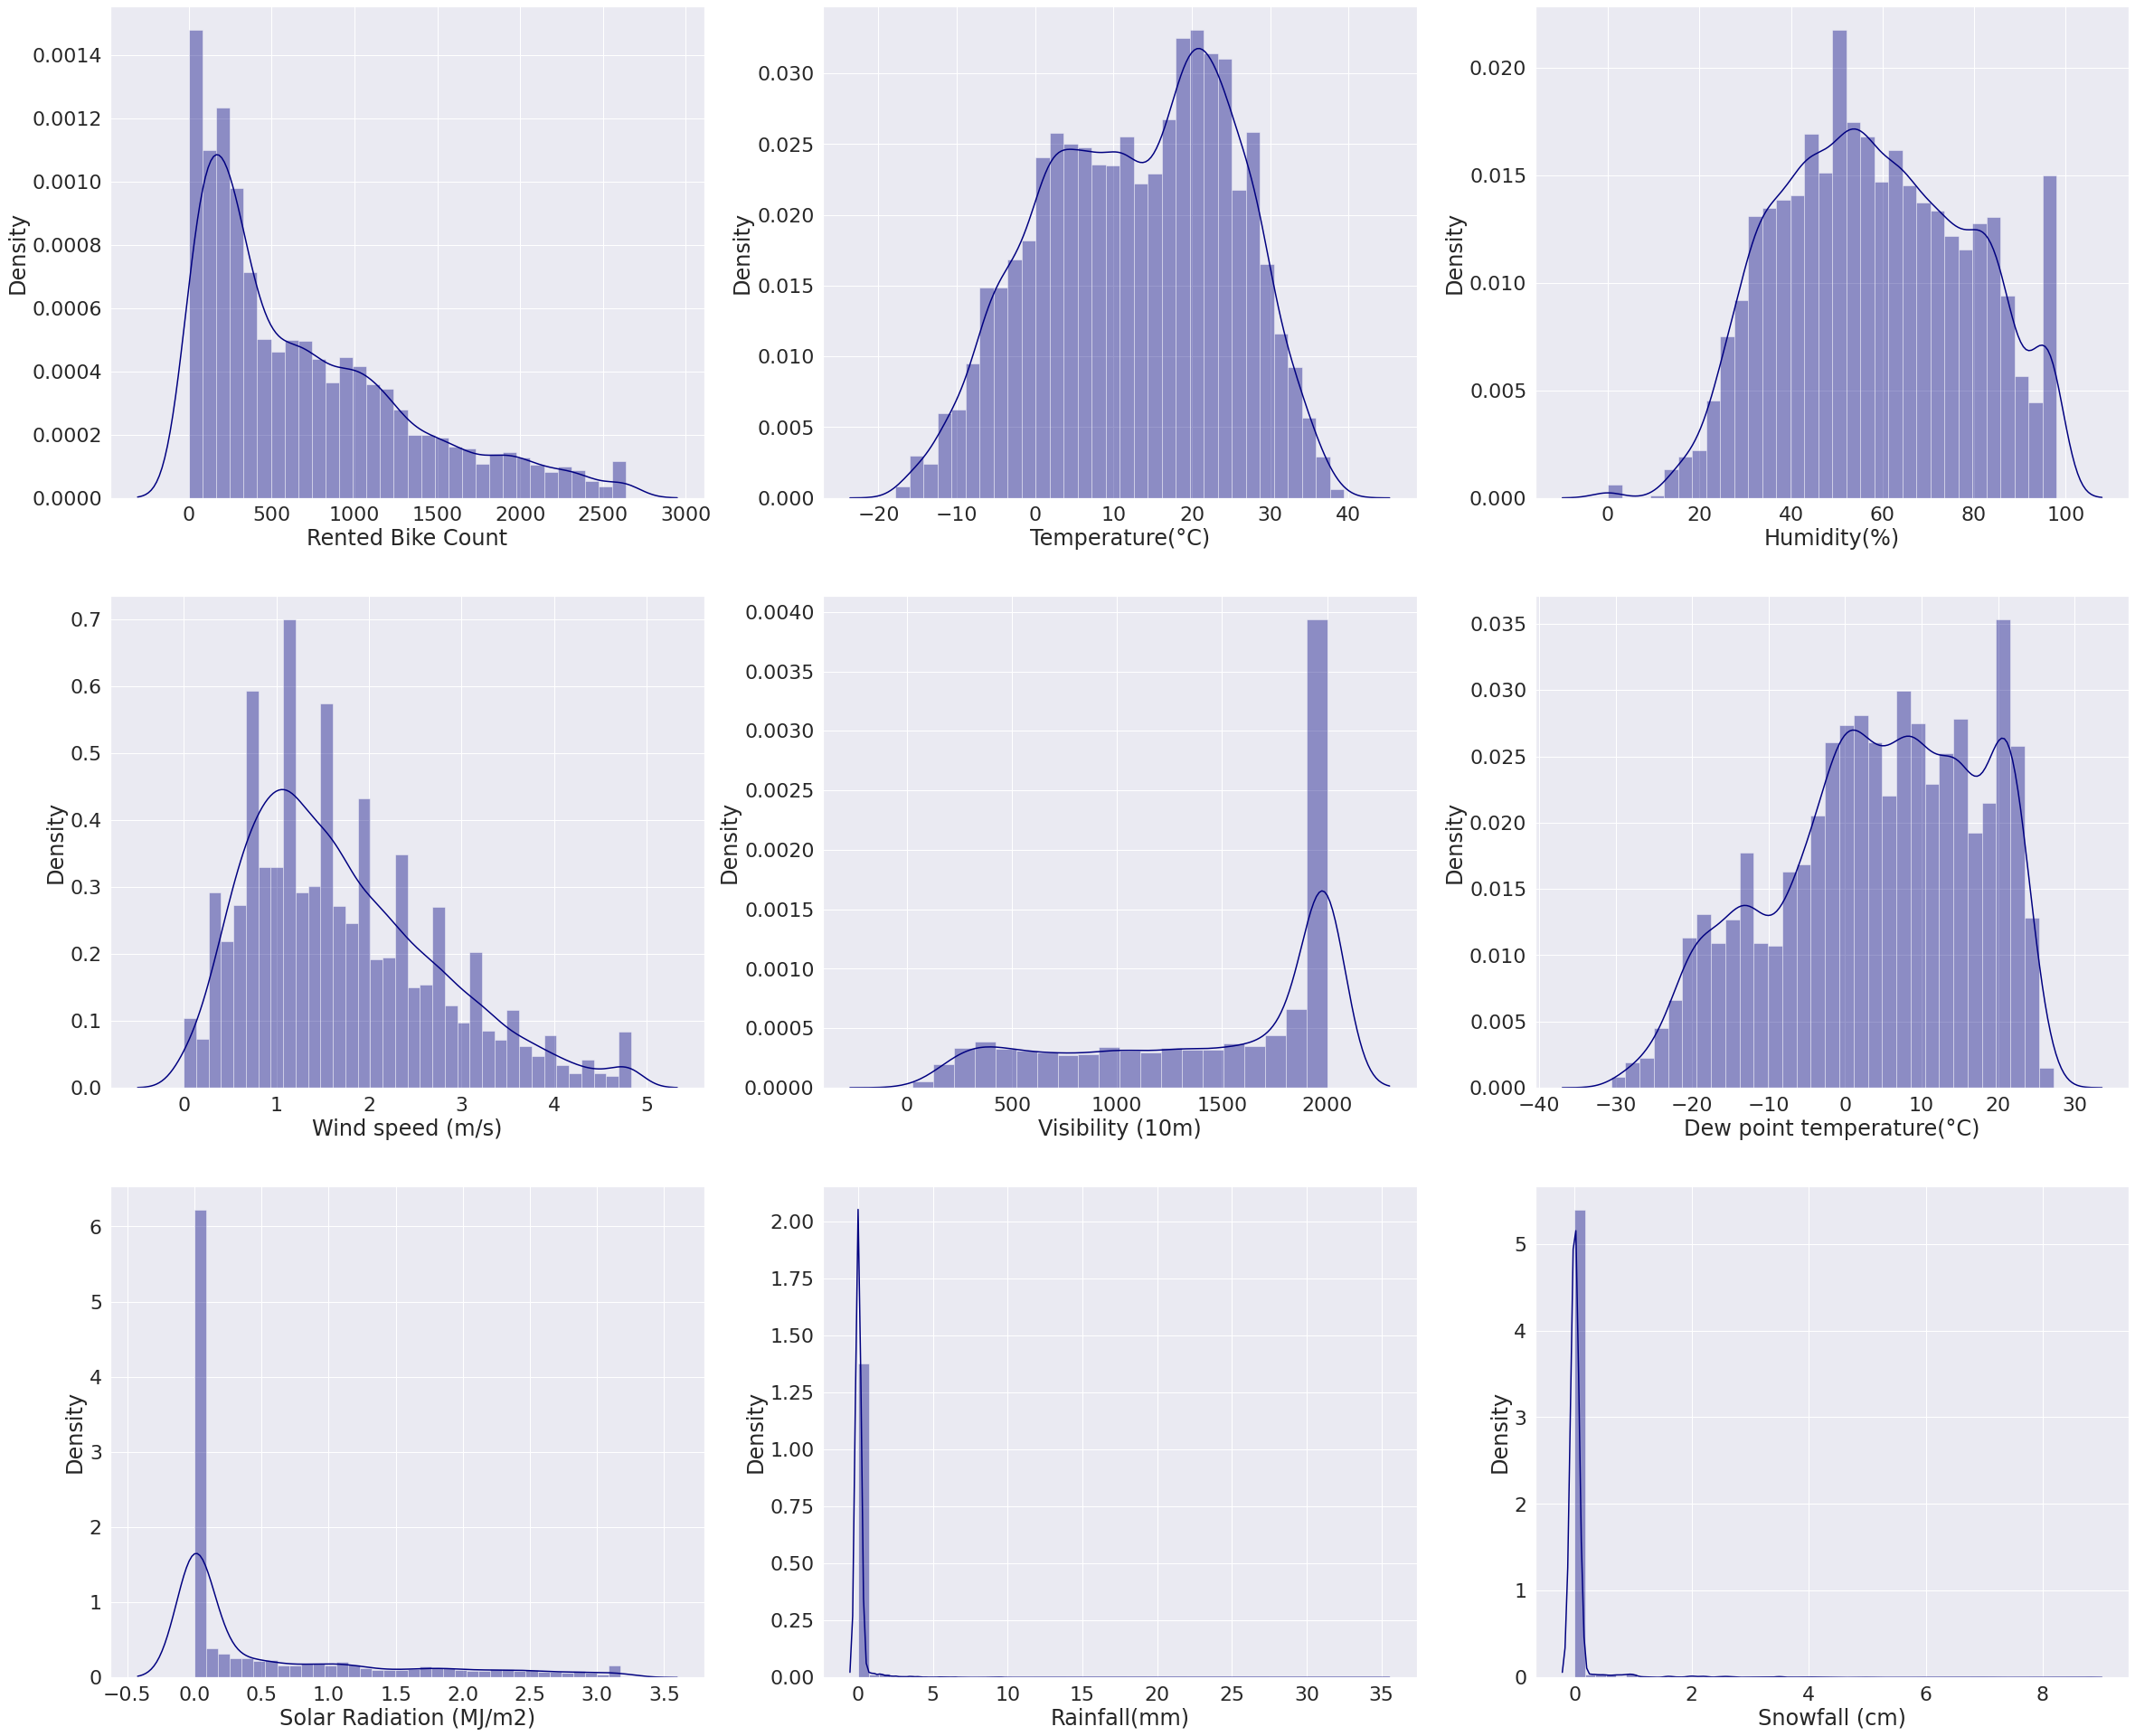

In [17]:
# Distribution plot for numerical variables
lst_dist = numerical_variables
numerical_variables.remove('Hour')
plt.figure(figsize = (40,70))
sns.set_theme()
for i in enumerate(lst_dist):
  sns.set(font_scale = 2)
  plt.subplot(6, 3,i[0]+1)
  sns.distplot(df[i[1]],color = 'navy')

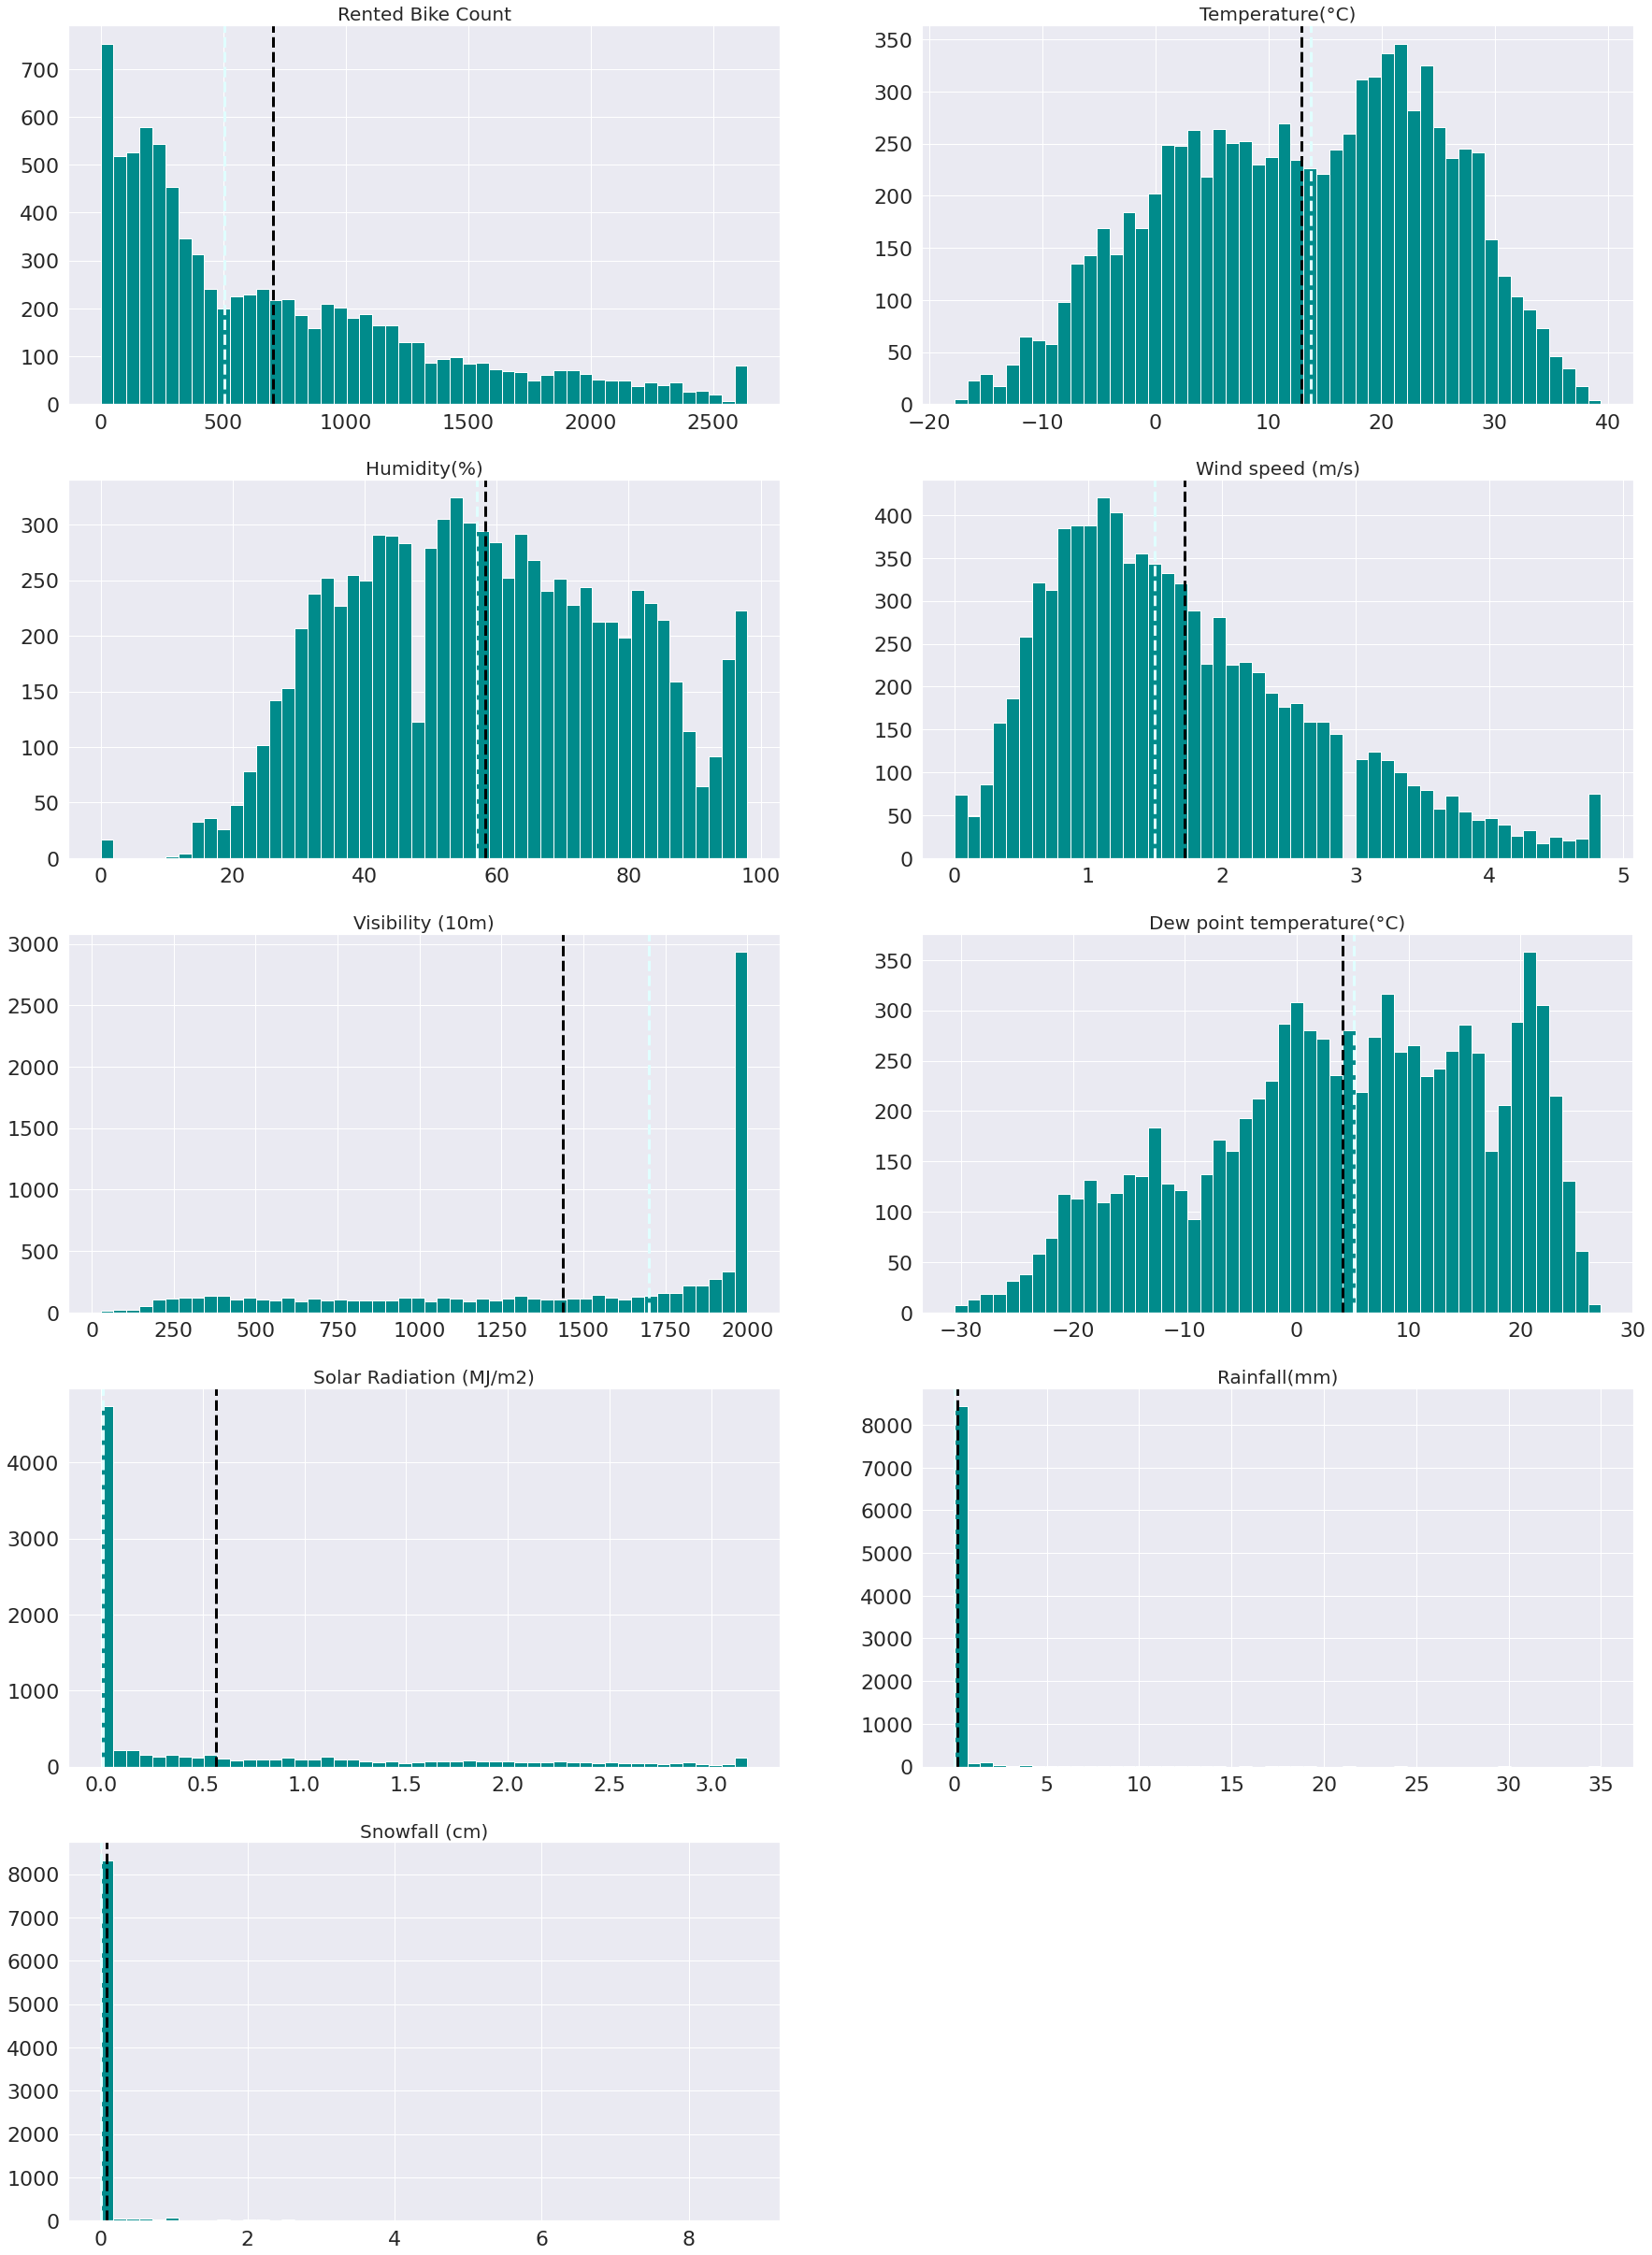

In [18]:
# Calculating mean and median

# numerical_variables.remove('Hour')
plt.figure(figsize = (30,70))

for i in enumerate(numerical_variables):
  plt.subplot(8, 2,i[0]+1)
  feature = df[i[1]]
  feature.hist(bins=50,color = 'darkcyan')
  plt.axvline(feature.mean(),color = 'black',linestyle='dashed', linewidth=3)
  plt.axvline(feature.median(),color = 'lightcyan',linestyle='dashed',linewidth=3)
  plt.title(i[1],fontsize = 20)

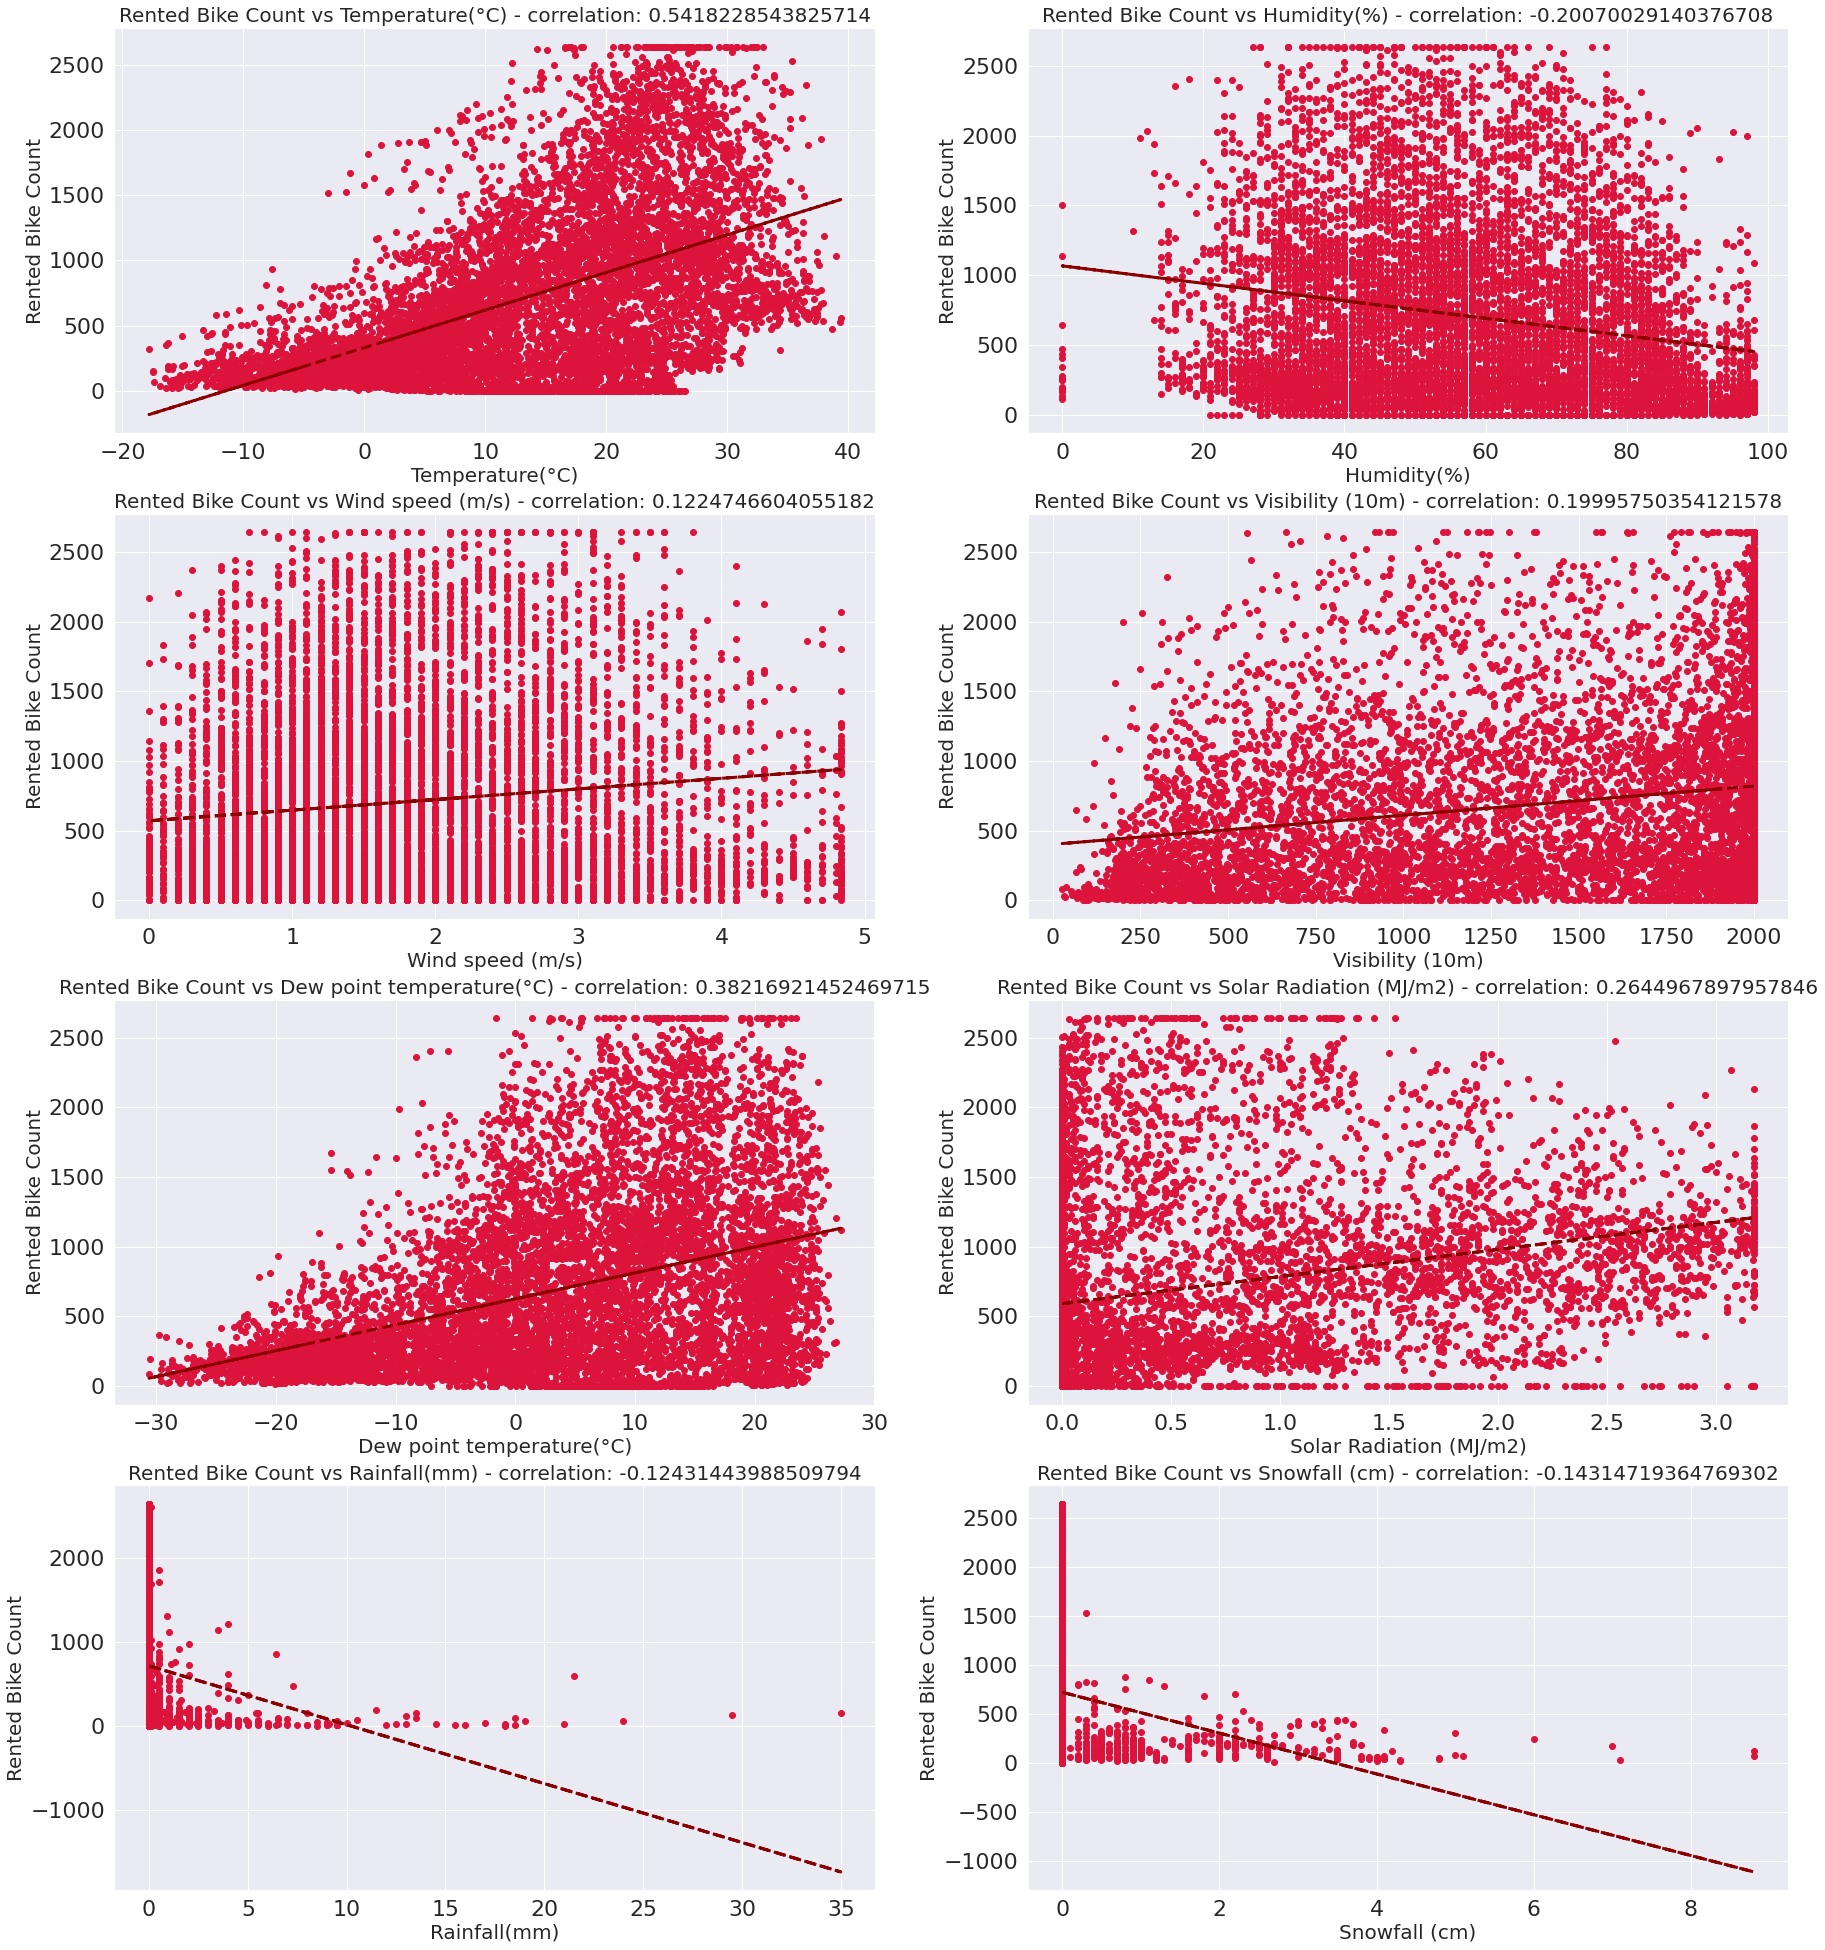

In [19]:
# Plotting scatter plot and correlation

plt.figure(figsize = (30,70))

numerical_variables.remove('Rented Bike Count')
for i in enumerate(numerical_variables):
  plt.subplot(8, 2,i[0]+1)
  feature = df[i[1]]
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label,color = 'crimson',alpha = 1)
  plt.xlabel(i[1],fontsize = 20)
  plt.ylabel('Rented Bike Count',fontsize = 20)
  plt.title('Rented Bike Count' + ' vs '  + i[1] + ' - correlation: ' + str(correlation),fontsize = 20)
  z = np.polyfit(df[i[1]], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[i[1]])
  plt.plot(df[i[1]], y_hat, "r--", lw=3,color = 'darkred')

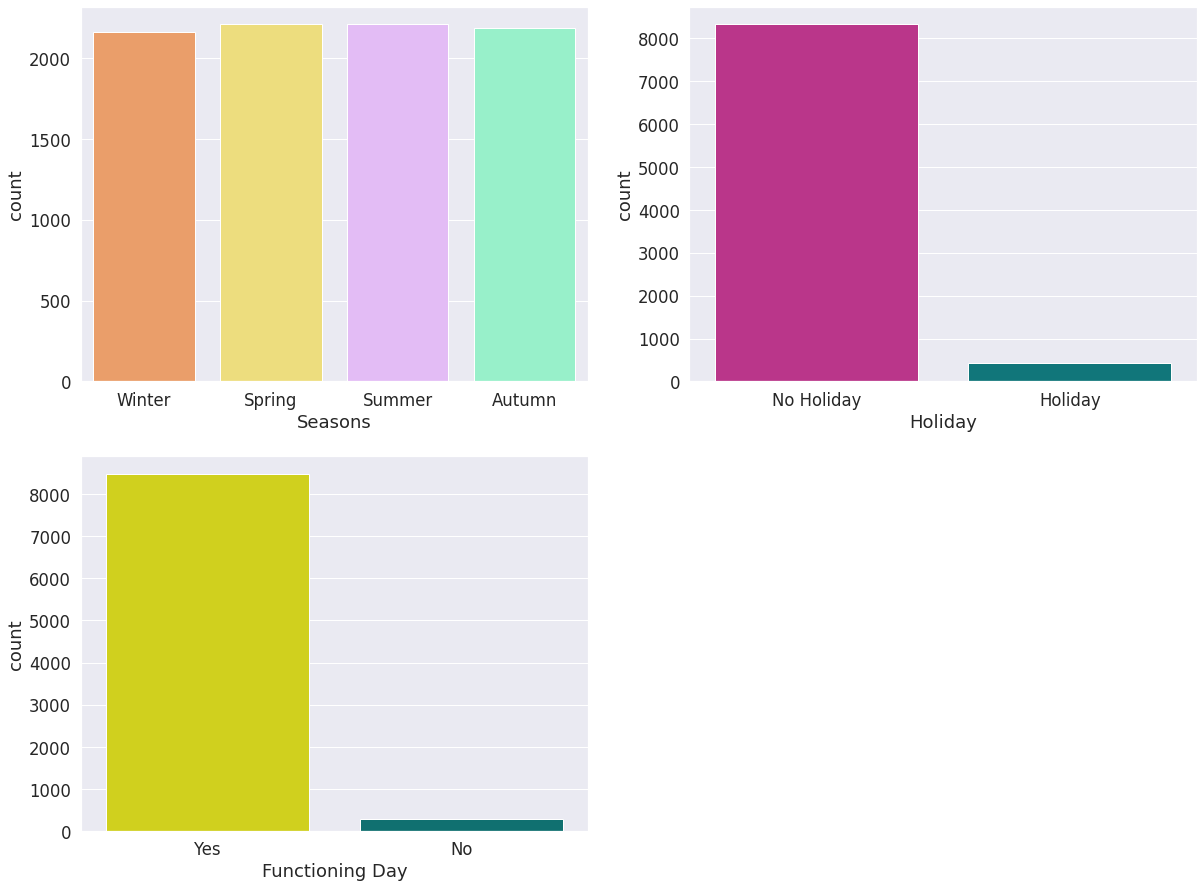

In [20]:
# Count Plot
categorical_var_count = ['Seasons', 'Holiday', 'Functioning Day']
plt.figure(figsize = (20,40))
sns.set_theme()
color = [['#ff9a55','#ffea6c','#e7b2ff','#89ffcc'],['#D02090','#00868B'],['#EEEE00','#008080']]
for i in enumerate(categorical_var_count):
  sns.set(font_scale = 1.5)
  plt.subplot(5, 2,i[0]+1)
  sns.countplot(data = df, x = df[i[1]],palette= color[i[0]])

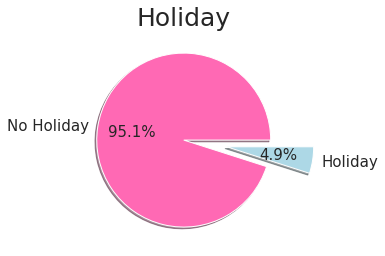

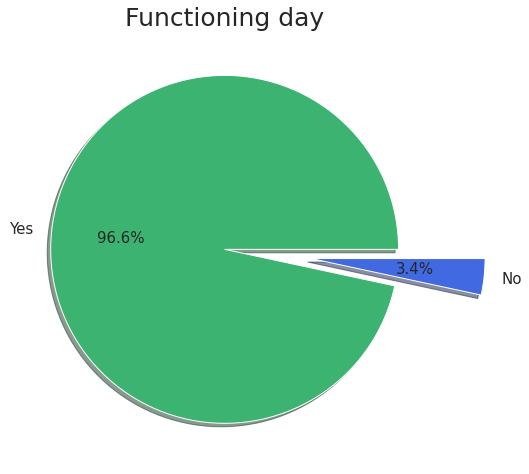

In [21]:
# Pie chart
valuesh= df['Holiday'].value_counts().tolist()
labelh = df['Holiday'].value_counts().index.tolist()
plt.pie(valuesh ,labels=labelh , radius=1,explode = [0,0.5],colors=['hotpink','lightblue'] ,textprops={'fontsize': 15}, autopct='%0.1f%%',shadow=True)
plt.rcParams['figure.figsize']=(9,8)
plt.title('Holiday',fontsize = 25)
plt.show()

valuesf= df['Functioning Day'].value_counts().tolist()
labelf = df['Functioning Day'].value_counts().index.tolist()
plt.pie(valuesf ,labels=labelf , radius=1,explode = [0,0.5],colors=['mediumseagreen','royalblue'] ,textprops={'fontsize': 15}, autopct='%0.1f%%',shadow=True)
plt.rcParams['figure.figsize']=(9,8)
plt.title('Functioning day',fontsize = 25)
plt.show()

Text(0.5, 1.0, 'Rented Bike Counts')

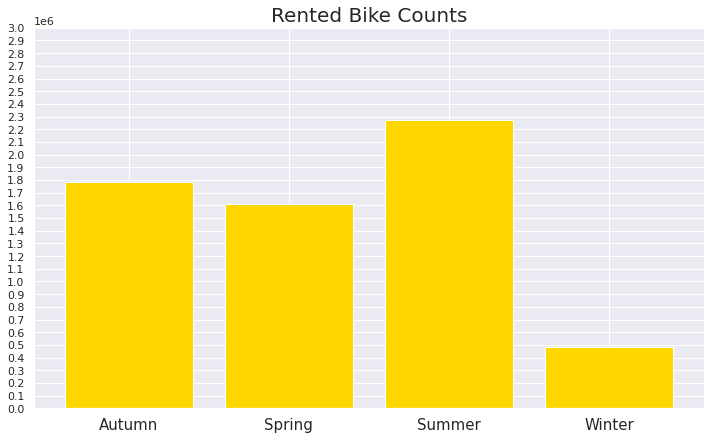

In [202]:
# Rented Bike Counts by Seasons
dep_counts = df['Rented Bike Count'].groupby(df['Seasons']).sum()
dep_df = pd.DataFrame(dep_counts).reset_index()
plt.figure(figsize = (12,7))
plt.bar(dep_df['Seasons'],dep_df['Rented Bike Count'],color = 'gold')
plt.xticks(fontsize = 15)
plt.yticks(list(range(0,3100000,100000)))
plt.title('Rented Bike Counts',fontsize = 20)


Text(0.5, 1.0, 'Rented Bike Counts')

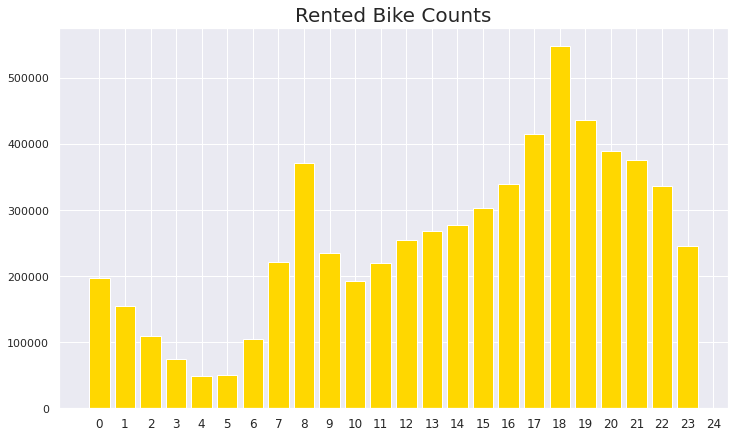

In [212]:
# Rented Bike Counts by Hours
dep_hr_counts = df['Rented Bike Count'].groupby(df['Hour']).sum()
dep_hr_df = pd.DataFrame(dep_hr_counts).reset_index()
plt.figure(figsize = (12,7))
plt.bar(dep_hr_df['Hour'],dep_hr_df['Rented Bike Count'],color = 'gold')
plt.xticks(list(range(0,25)),fontsize = 12)
plt.yticks(list(range(0,600000,100000)),fontsize = 11)
plt.title('Rented Bike Counts',fontsize = 20)

In [213]:
#Convert the Date column in Datetime Dtype
df = pd.read_csv('/content/My_drive/MyDrive/Capstone_Project_Supervised_ML_Bike_Demand_Prediction/Copy of SeoulBikeData.csv',encoding= 'unicode_escape')

df_d = df
df_d['Date']=pd.to_datetime(df_d['Date'],format='%d/%m/%Y')

#Breaking Down the Date into 3 Components
df_d['Day']=df_d['Date'].dt.day
df_d['Month']=df_d['Date'].dt.month
df_d['Year']=df_d['Date'].dt.year

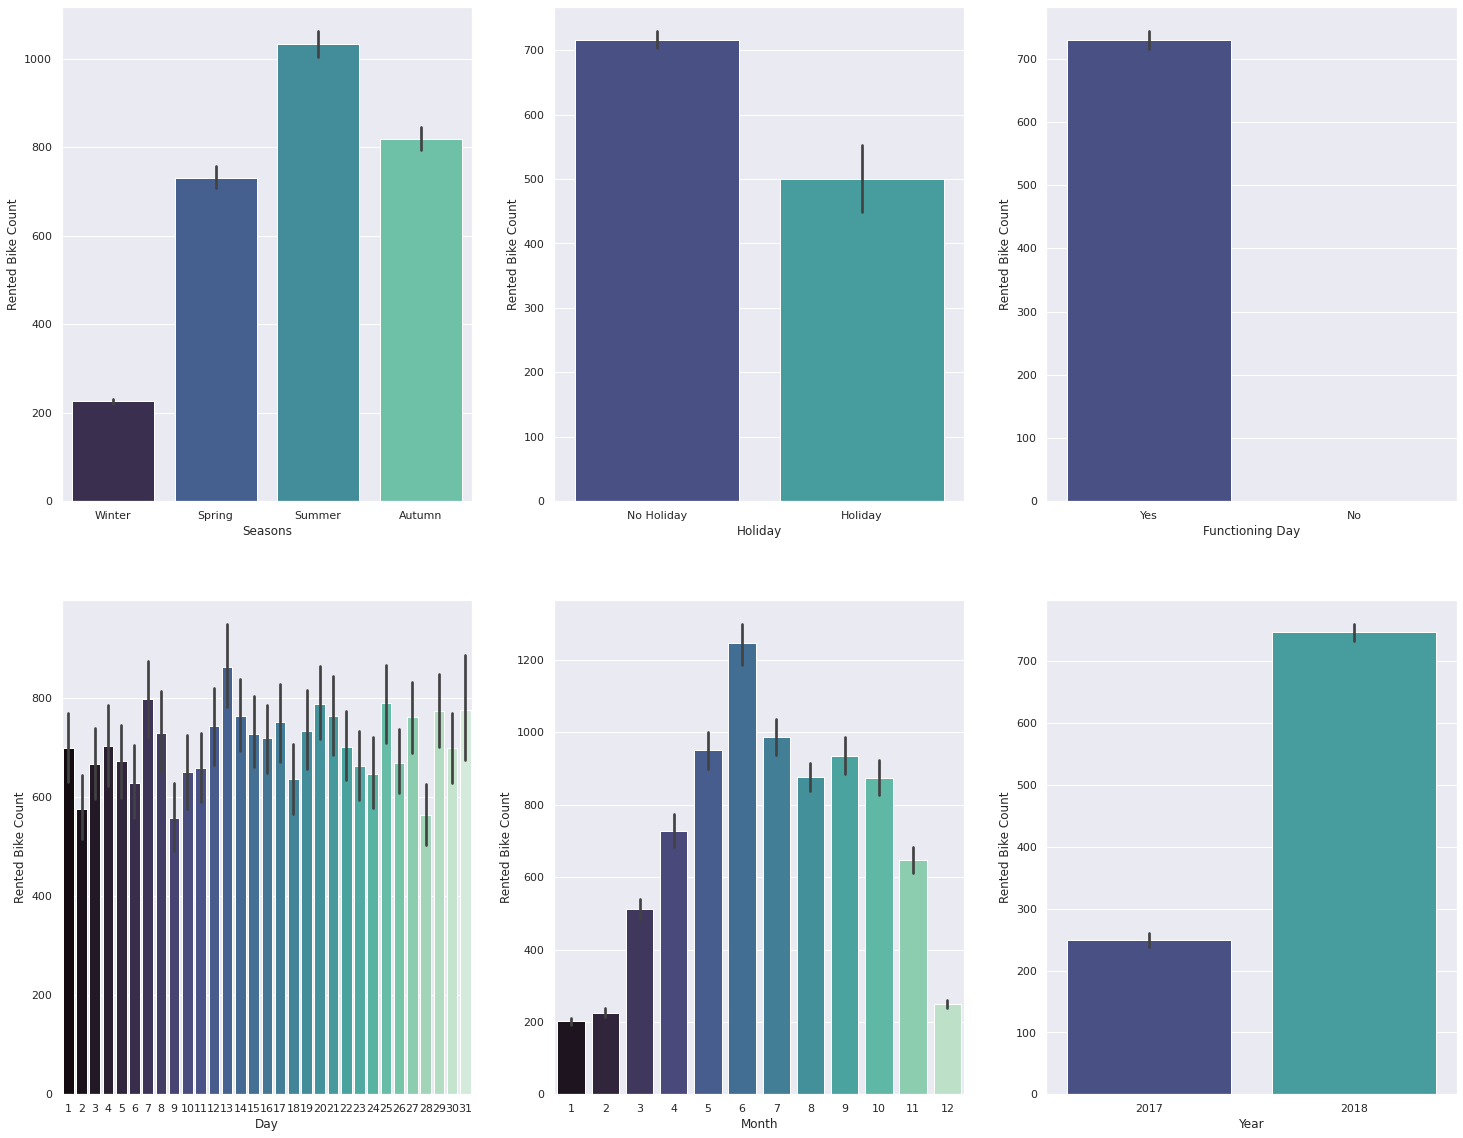

In [216]:
dep_list = ['Seasons',	'Holiday',	'Functioning Day',	'Day',	'Month',	'Year']
plt.figure(figsize = (25, 20))
for i in enumerate(dep_list):
    plt.subplot(2,3,i[0]+1)
    sns.barplot(x=df[i[1]],y='Rented Bike Count',data=df_d,palette='mako')

In [205]:
dep_hr_df

,Hour,Rented Bike Count
0,0,197633.000000
1,1,155557.000000
2,2,110095.000000
3,3,74216.000000
4,4,48396.000000
5,5,50765.000000
6,6,104961.000000
7,7,221192.000000
8,8,370731.000000
9,9,235784.000000


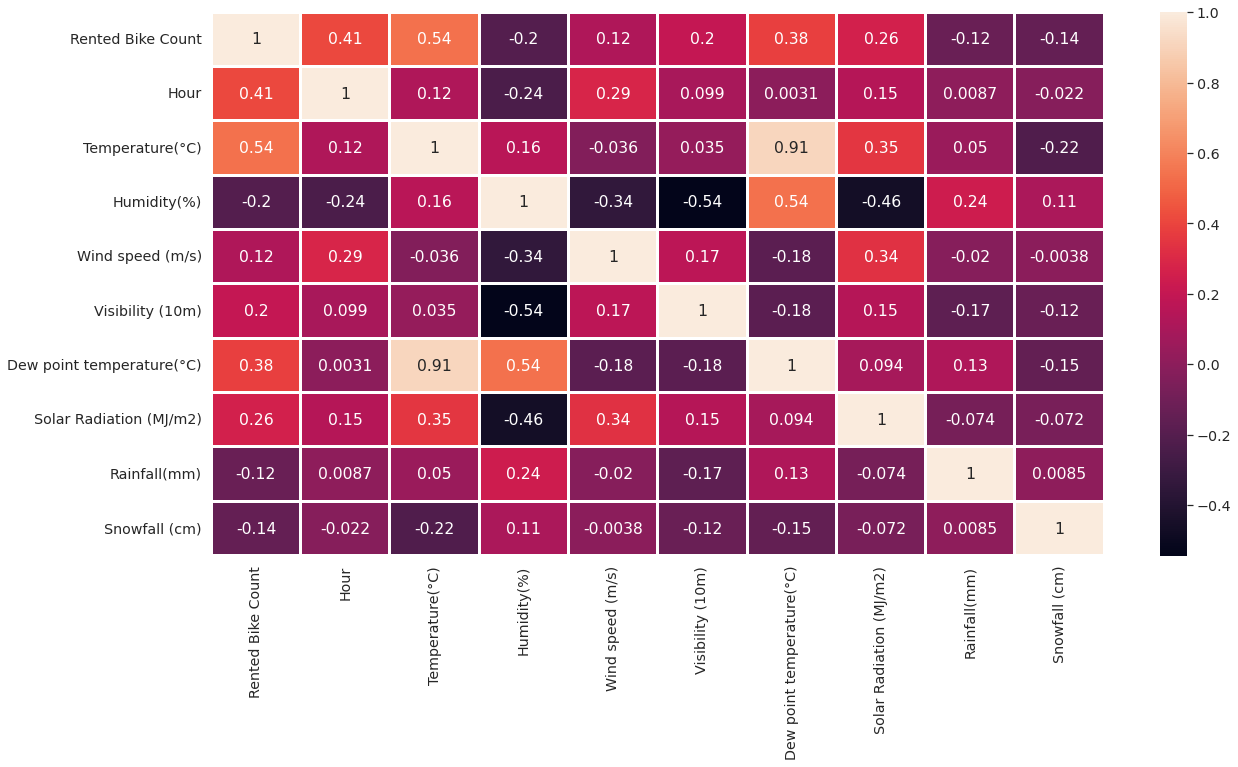

In [22]:
# Multicolinearity

plt.figure(figsize = (20, 10))
df_co_relation = df.corr()
sns.set(font_scale = 1.3)
sns.heatmap(df_co_relation, annot = True, linewidths = 2)
plt.show()

In [23]:
# There exists a high multicollinearity between Temperature and Dew point Temperature
# Lets create a feature new feature Temperature which comprises the addition of temperature and dew point temperature
df['Temperature'] = df['Temperature(°C)'] + df['Dew point temperature(°C)']
df.drop('Temperature(°C)',axis = 1,inplace = True)
df.drop('Dew point temperature(°C)',axis = 1,inplace = True)

In [24]:
# Varinace Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [25]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Rented Bike Count']]])

,variables,VIF
0,Hour,3.877343
1,Humidity(%),5.118281
2,Wind speed (m/s),4.767596
3,Visibility (10m),4.743852
4,Solar Radiation (MJ/m2),2.073688
5,Rainfall(mm),1.079532
6,Snowfall (cm),1.117344
7,Temperature,2.183298


In [26]:
# One hot encoding
data = pd.get_dummies(df,columns = ['Hour','Seasons','Holiday','Functioning Day'])
data.drop(['Hour_0','Seasons_Autumn','Holiday_Holiday','Functioning Day_No'],axis = 1,inplace = True)
data.head()

,Rented Bike Count,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Temperature,Hour_1,Hour_2,...,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254.0,37.0,2.2,2000.0,0.0,0.0,0.0,-22.8,0,0,...,0,0,0,0,0,0,0,1,1,1
1,204.0,38.0,0.8,2000.0,0.0,0.0,0.0,-23.1,1,0,...,0,0,0,0,0,0,0,1,1,1
2,173.0,39.0,1.0,2000.0,0.0,0.0,0.0,-23.7,0,1,...,0,0,0,0,0,0,0,1,1,1
3,107.0,40.0,0.9,2000.0,0.0,0.0,0.0,-23.8,0,0,...,0,0,0,0,0,0,0,1,1,1
4,78.0,36.0,2.3,2000.0,0.0,0.0,0.0,-24.6,0,0,...,0,0,0,0,0,0,0,1,1,1


In [27]:
# Columns
data.columns

Index(['Rented Bike Count', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Temperature', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes'],
      dtype='object')

In [28]:
independent_variables = data.columns.tolist()
independent_variables.remove('Rented Bike Count')
dependent_variable = ['Rented Bike Count']
print(independent_variables)
print(dependent_variable)

['Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Temperature', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes']
['Rented Bike Count']


In [29]:
X = data[independent_variables].values
y = data[dependent_variable].values

In [30]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
# Transforming data

# Normailzation
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [32]:
# Linear Regression
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
print(regressor.intercept_)
print(regressor.coef_)
# y train preds
y_pred_train = regressor.predict(X_train)
y_pred_train

# Predicting the Test set results
y_pred_test = regressor.predict(X_test)
y_pred_test

[-439.63117222]
[[ -907.10879817    12.70719526    25.71811059   262.90460657
  -1902.67138829   200.62836944  1291.62410352   -97.58588613
   -219.60458002  -290.68502882  -352.81019772  -336.52654056
   -159.43037035   123.31105845   455.53174331    22.60351854
   -213.40914998  -228.4808506   -190.12610681  -199.75647251
   -193.35803643   -94.96573747    44.59768559   305.88196455
    712.70520572   513.12792844   444.08456505   421.81206712
    335.22734825    96.97078758  -145.15697819  -153.29093631
   -353.7029944    128.03363631   900.96374958]]


array([[ 256.24098693],
       [ 694.19972758],
       [ 542.36573732],
       ...,
       [1271.10973152],
       [   7.47308193],
       [1196.46017442]])

In [34]:
print('Train r2_score:',r2_score(y_train, y_pred_train)*100)
print('Test r2_score:',r2_score(y_test, y_pred_test)*100)
print("Adjusted r2_score: ",(1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error:',mean_squared_error(y_test, y_pred_test))

Train r2_score: 66.41539856494032
Test r2_score: 67.01801689329592
Adjusted r2_score:  66.48209794773668
Mean Squared Error: 133073.1037404705


In [35]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_poly_predicted = poly_model.predict(X_train_poly)
y_test_poly_predict = poly_model.predict(poly_features.fit_transform(X_test))

In [36]:
print('Train r2_score:',r2_score(y_train,y_train_poly_predicted)*100)
print('Test r2_score:',r2_score(y_test, y_test_poly_predict)*100)
print("Adjusted r2_score : ",(1-(1-r2_score(y_test, y_test_poly_predict))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error:',mean_squared_error(y_test, y_test_poly_predict))


Train r2_score: 84.66078669401583
Test r2_score: 82.51818815623515
Adjusted r2_score :  82.23412900371343
Mean Squared Error: 70534.23541969614


In [37]:
# Lasso Regression

lasso  = Lasso(alpha=0.0004 , max_iter= 3000)
lasso.fit(X_train_poly, y_train)
lasso.score(X_train_poly, y_train)
y_train_lasso_pred = poly_model.predict(X_train_poly)
y_test_lasso_pred = poly_model.predict(poly_features.fit_transform(X_test))
print('Train r2_score:',r2_score(y_train,y_train_lasso_pred)*100)
print('Test r2_score:',r2_score(y_test, y_test_lasso_pred)*100)
print("Adjusted r2_score: ",(1-(1-r2_score(y_test, y_test_lasso_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error:',mean_squared_error(y_test, y_test_lasso_pred))


Train r2_score: 84.66078669401583
Test r2_score: 82.51818815623515
Adjusted r2_score:  82.23412900371343
Mean Squared Error: 70534.23541969614


In [38]:
# Cross validation and Hyperparameter tunning for Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.0001,0.0002,0.0004,0.0007]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train_poly, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0004, 0.0007]},
             scoring='neg_mean_squared_error')

In [39]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0007}

Using  {'alpha': 0.0007}  the negative mean squared error is:  -84718.90134899752


In [40]:
y_train_lasso_cv_pred = lasso_regressor.predict(X_train_poly)
y_test_lasso_cv_pred = lasso_regressor.predict(poly_features.fit_transform(X_test))

In [41]:
print('Train r2_score:',r2_score(y_train,y_train_lasso_cv_pred)*100)
print('Test r2_score:',r2_score(y_test, y_test_lasso_cv_pred)*100)
print("Adjusted r2_score: ",(1-(1-r2_score(y_test, y_test_lasso_cv_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error:',mean_squared_error(y_test, y_test_lasso_cv_pred))

Train r2_score: 84.55170487243315
Test r2_score: 82.55208482847294
Adjusted r2_score:  82.26857645753356
Mean Squared Error: 70397.47180040245


In [42]:
# Ridge Regression

ridge  = Ridge(alpha=0.0001 , max_iter= 3000)
ridge.fit(X_train_poly, y_train)
ridge.score(X_train_poly, y_train)
y_train_ridge_pred = poly_model.predict(X_train_poly)
y_test_ridge_pred = poly_model.predict(poly_features.fit_transform(X_test))
print('Train r2_score:',r2_score(y_train,y_train_ridge_pred)*100)
print('Test r2_score:',r2_score(y_test, y_test_ridge_pred)*100)
print("Adjusted r2_score: ",(1-(1-r2_score(y_test, y_test_ridge_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error:',mean_squared_error(y_test, y_test_ridge_pred))

Train r2_score: 84.66078669401583
Test r2_score: 82.51818815623515
Adjusted r2_score:  82.23412900371343
Mean Squared Error: 70534.23541969614


In [43]:
# Cross validation and Hyperparameter tunning for Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train_poly,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [44]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -75503.97248905375


In [45]:
y_train_ridge_cv_pred = ridge_regressor.predict(X_train_poly)
y_test_ridge_cv_pred  = ridge_regressor.predict(poly_features.fit_transform(X_test))

In [46]:
print('Train r2_score:',r2_score(y_train,y_train_ridge_cv_pred)*100)
print('Test r2_score:',r2_score(y_test, y_test_ridge_cv_pred)*100)
print("Adjusted r2_score: ",(1-(1-r2_score(y_test, y_test_ridge_cv_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error:',mean_squared_error(y_test, y_test_ridge_cv_pred))

Train r2_score: 83.27571962815745
Test r2_score: 82.29316094872271
Adjusted r2_score:  82.00544536525257
Mean Squared Error: 71442.15744587788


In [47]:
# From regression model we couldn't get the desired R2_score


In [48]:
# As Decision tree is robust to outliers and multicollinearity
# Loading the file
df_d = pd.read_csv('/content/My_drive/MyDrive/Capstone_Project_Supervised_ML_Bike_Demand_Prediction/Copy of SeoulBikeData.csv',encoding= 'unicode_escape')

In [49]:
df_d.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [50]:
# One hot encoding
df_dt = pd.get_dummies(df_d,columns = ['Hour','Seasons','Holiday','Functioning Day'])
df_dt.drop(['Hour_0','Seasons_Autumn','Holiday_Holiday','Functioning Day_No'],axis = 1,inplace = True)
df_dt.head()

,Date,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,01/12/2017,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1
1,01/12/2017,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1
2,01/12/2017,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1
3,01/12/2017,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1
4,01/12/2017,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1


In [51]:
df_dt.columns

Index(['Date', 'Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes'],
      dtype='object')

In [52]:
independent_variables_dt = ['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes']
dependent_variables_dt = ['Rented Bike Count']
X_dt = df_dt[independent_variables_dt].values
y_dt = df_dt[dependent_variables_dt].values
y_dt = np.sqrt(y_dt)

In [53]:
# Train Test Split
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size = 0.35, random_state = 0)

In [54]:
# Normailzation
scaler = StandardScaler()
X_train_dt = scaler.fit_transform(X_train_dt)
X_test_dt = scaler.transform(X_test_dt)

In [55]:
# Decision Tree Regressor

decision_tree_reg = DecisionTreeRegressor(criterion = 'squared_error',splitter = 'best')
decision_tree_reg.fit(X_train_dt,y_train_dt)

DecisionTreeRegressor()

In [56]:
y_train_pred_dec_reg = decision_tree_reg.predict(X_train_dt)
y_test_pred_dec_reg = decision_tree_reg.predict(X_test_dt)

In [57]:
print('Train r2_score :',r2_score(y_train_dt,y_train_pred_dec_reg)*100)
print('Test r2_score :',r2_score(y_test_dt,y_test_pred_dec_reg)*100)
print("Adjusted r2_score: ",(1-(1-r2_score(y_test_dt, y_test_pred_dec_reg))*((X_test_dt.shape[0]-1)/(X_test_dt.shape[0]-X_test_dt.shape[1]-1)))*100)
print('Mean Squared Error:',mean_squared_error(y_test_dt, y_test_pred_dec_reg))

Train r2_score : 100.0
Test r2_score : 77.60514070466557
Adjusted r2_score:  77.3389753251238
Mean Squared Error: 34.45329756498689


In [58]:
# Overfitting occcured so Ensenble will be used.

In [59]:
# Random Forest Regressor


rfr  = RandomForestRegressor()
rfr.fit(X_train_dt,y_train_dt)
y_train_rfr_pred = rfr.predict(X_train_dt)
y_test_rfr_pred = rfr.predict(X_test_dt)

print('Train r2_score :',r2_score(y_train_dt,y_train_rfr_pred)*100)
print('Test r2_score :',r2_score(y_test_dt,y_test_rfr_pred)*100)
print("Adjusted r2_score: ",(1-(1-r2_score(y_test_dt, y_test_rfr_pred))*((X_test_dt.shape[0]-1)/(X_test_dt.shape[0]-X_test_dt.shape[1]-1)))*100)
print('Mean Squared Error:',mean_squared_error(y_test_dt, y_test_rfr_pred))

Train r2_score : 98.37937855722973
Test r2_score : 88.58972836490643
Adjusted r2_score:  88.45411602457517
Mean Squared Error: 17.55409483743032


In [60]:
# Cross validation and Hyperparameter tunning for Random Forest Regressor

rfr  = RandomForestRegressor(criterion='squared_error')
grid_values = {'n_estimators' : [50],'max_depth': [20],'min_samples_split' : [60],'min_samples_leaf':[1]}
rfr = GridSearchCV(rfr,param_grid = grid_values ,cv = 5, verbose=2)
rfr.fit(X_train_dt,y_train_dt)
y_train_rfr_cv_pred = rfr.predict(X_train_dt)
y_test_rfr_cv_pred = rfr.predict(X_test_dt)
print('Train r2_score :',r2_score(y_train_dt,y_train_rfr_cv_pred)*100)
print('Test r2_score:',r2_score(y_test_dt,y_test_rfr_cv_pred)*100)
print("Adjusted r2_score: ",(1-(1-r2_score(y_test_dt, y_test_rfr_cv_pred))*((X_test_dt.shape[0]-1)/(X_test_dt.shape[0]-X_test_dt.shape[1]-1)))*100)
print('Mean Squared Error:',mean_squared_error(y_test_dt, y_test_rfr_cv_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=60, n_estimators=50; total time=   0.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=60, n_estimators=50; total time=   0.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=60, n_estimators=50; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=60, n_estimators=50; total time=   0.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=60, n_estimators=50; total time=   0.9s
Train r2_score : 89.80712376562204
Test r2_score: 86.89618037448065
Adjusted r2_score:  86.74044002898091
Mean Squared Error: 20.159528168591315


In [61]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train_dt,y_train_dt)
y_train_gbr_pred = gbr.predict(X_train_dt)
y_test_gbr_pred = gbr.predict(X_test_dt)
print('Train r2_score :',r2_score(y_train_dt,y_train_gbr_pred)*100)
print('Test r2_score :',r2_score(y_test_dt,y_test_gbr_pred)*100)
print("Adjusted r2_score: ",(1-(1-r2_score(y_test_dt, y_test_gbr_pred))*((X_test_dt.shape[0]-1)/(X_test_dt.shape[0]-X_test_dt.shape[1]-1)))*100)
print('Mean Squared Error:',mean_squared_error(y_test_dt, y_test_gbr_pred))

Train r2_score : 86.26979531878945
Test r2_score : 84.49596164265483
Adjusted r2_score:  84.311694432069
Mean Squared Error: 23.852136775687082


In [62]:
# Cross validation and Hyperparameter tunning for Gradient Boosting Regressor

gbr = GradientBoostingRegressor(min_samples_leaf=1,criterion='squared_error')
grid_values = {'n_estimators' : [100],'max_depth': [60],'min_samples_split' : [90],'min_samples_leaf' :[15]}
gbr_gscv = GridSearchCV(gbr,param_grid = grid_values ,cv = 5)
gbr.fit(X_train_dt,y_train_dt)
y_train_gbr_cv_pred = gbr.predict(X_train_dt)
y_test_gbr_cv_pred = gbr.predict(X_test_dt)
# gbr_gscv.best_estimator_
# optimum_parameters = gbr_gscv.best_estimator_
# print(optimum_parameters)
print('Train r2_score :',r2_score(y_train_dt,y_train_gbr_cv_pred)*100)
print('Test r2_score :',r2_score(y_test_dt,y_test_gbr_cv_pred)*100)
print("Adjusted r2_score: ",(1-(1-r2_score(y_test_dt, y_test_gbr_cv_pred))*((X_test_dt.shape[0]-1)/(X_test_dt.shape[0]-X_test_dt.shape[1]-1)))*100)
print('Mean Squared Error:',mean_squared_error(y_test_dt, y_test_gbr_cv_pred))

Train r2_score : 86.26979531878945
Test r2_score : 84.49120431043242
Adjusted r2_score:  84.30688055842698
Mean Squared Error: 23.85945567778477


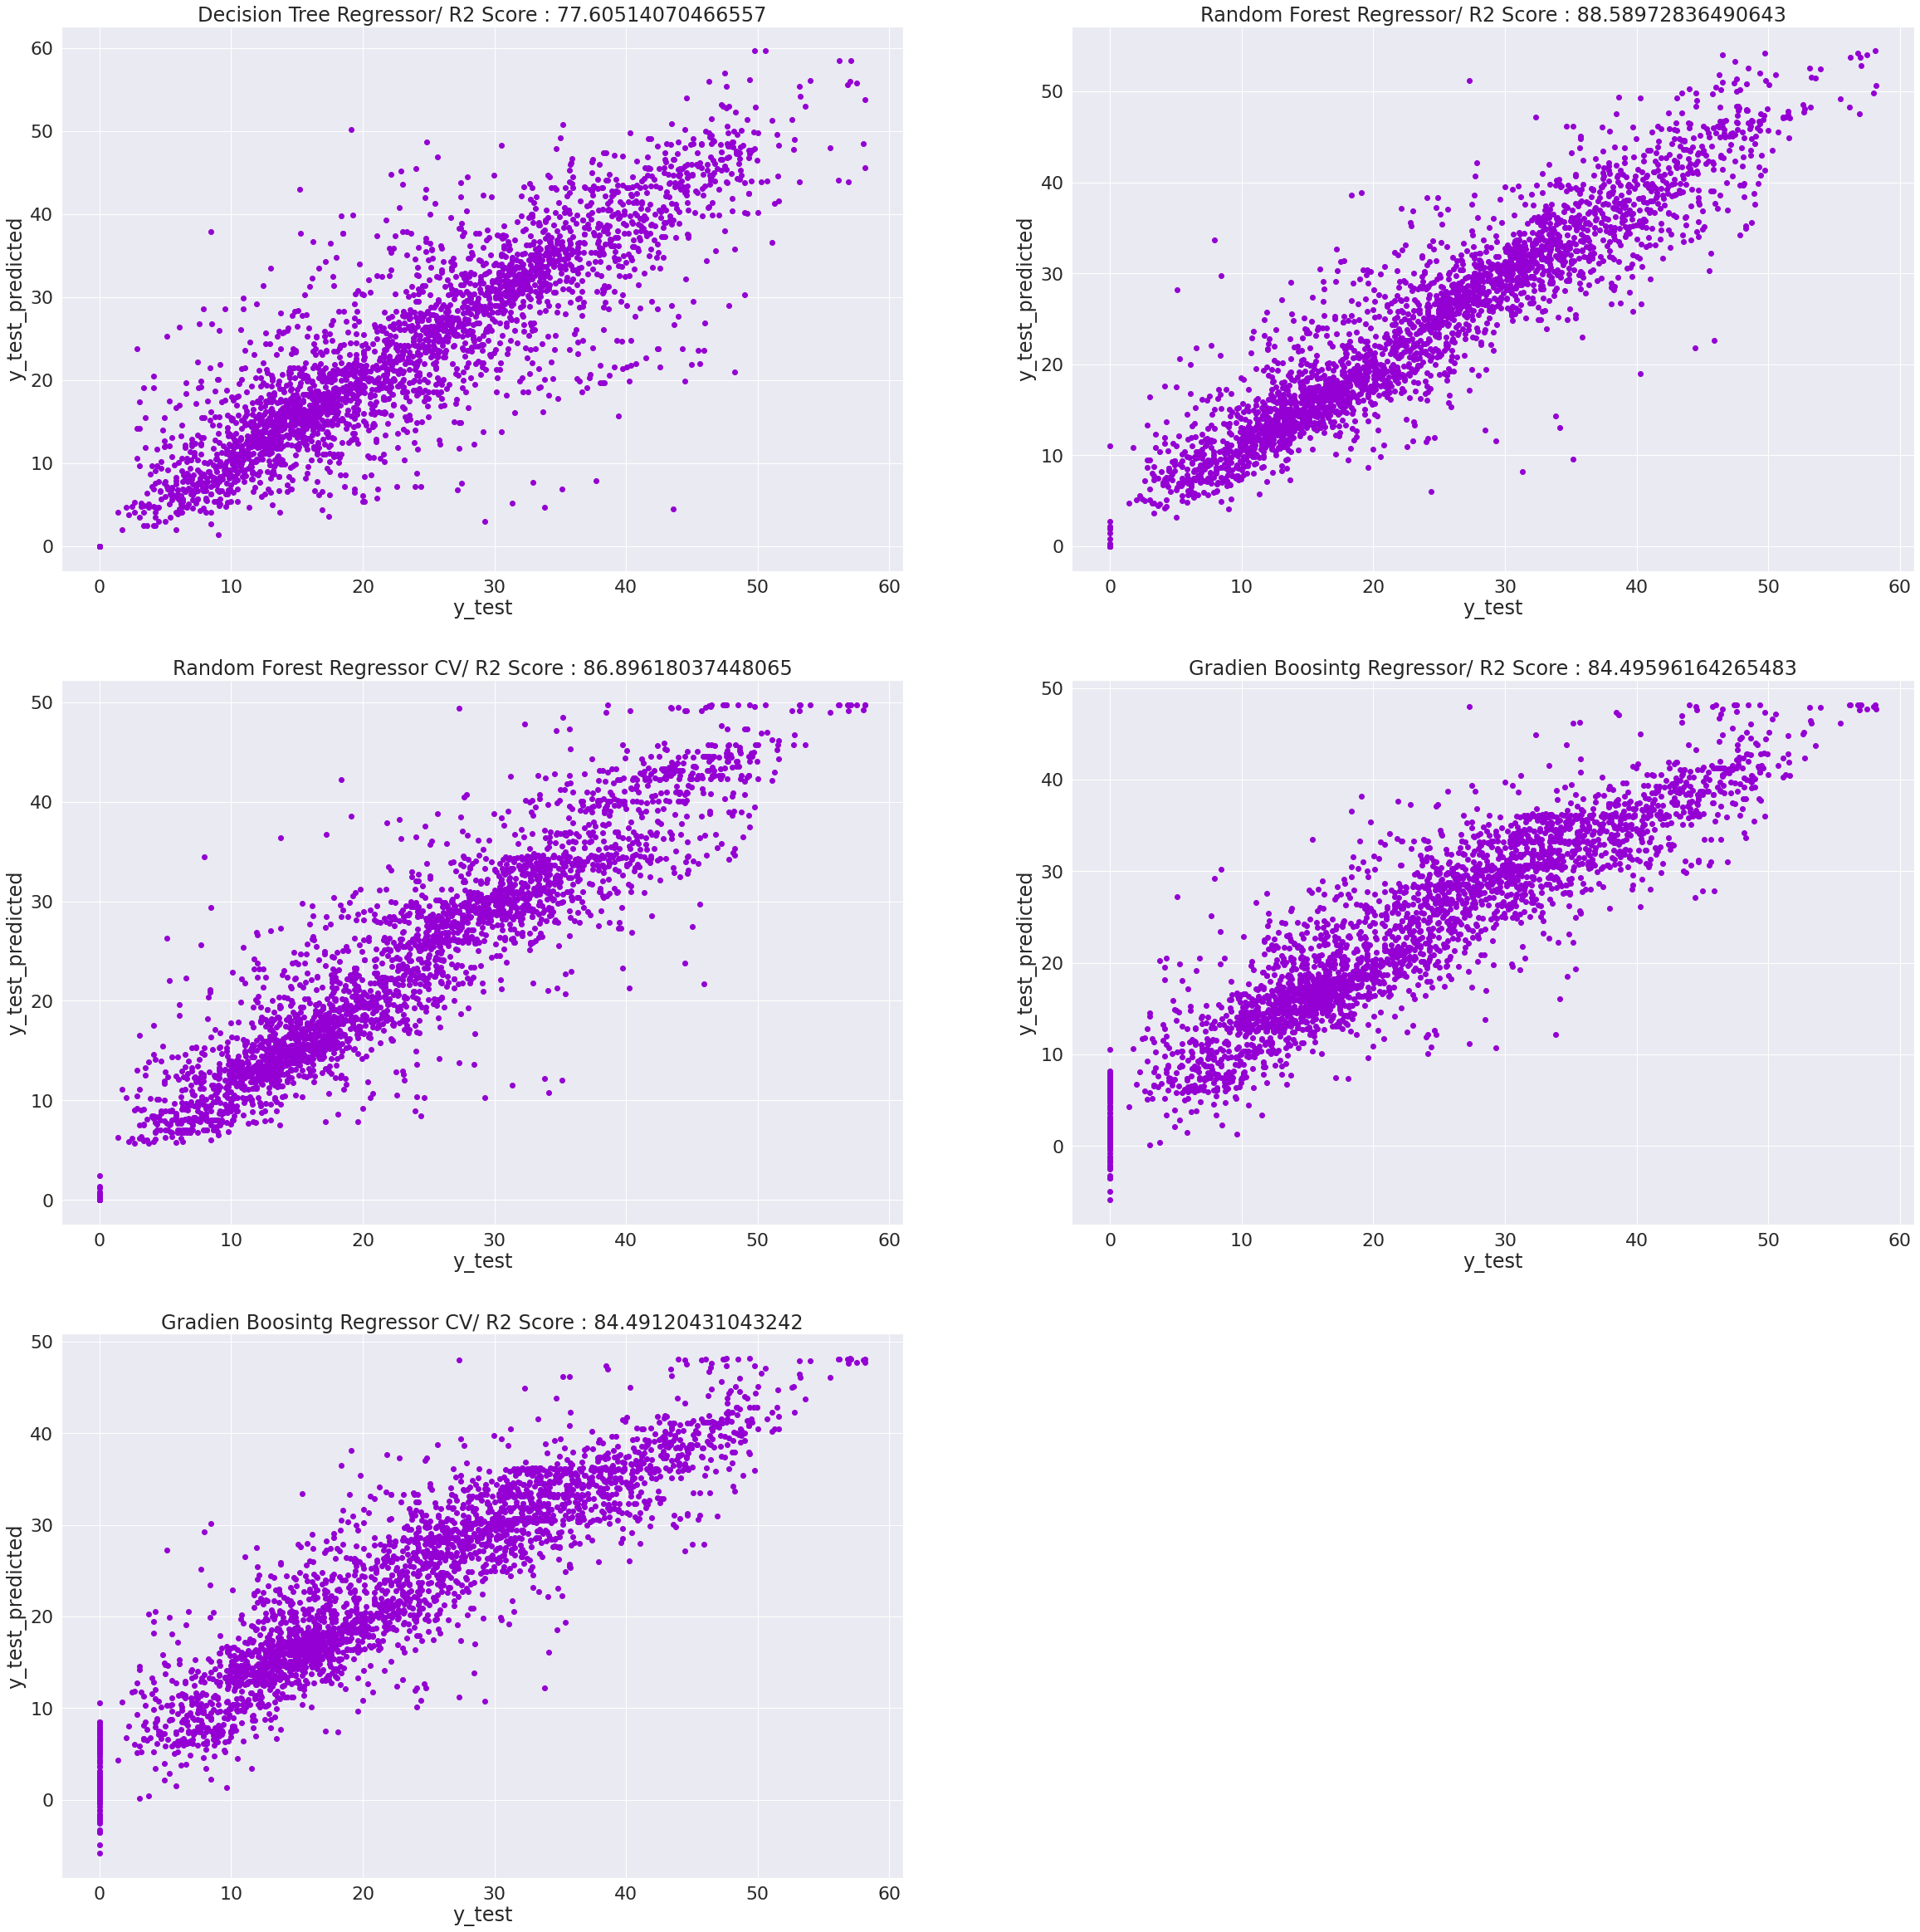

In [63]:
# Visual representation of Decision Tree model's prediction

lst_model = [y_test_pred_dec_reg,y_test_rfr_pred,y_test_rfr_cv_pred,y_test_gbr_pred,y_test_gbr_cv_pred]
title = ['Decision Tree Regressor','Random Forest Regressor','Random Forest Regressor CV','Gradien Boosintg Regressor','Gradien Boosintg Regressor CV']
lst_model_acc = [r2_score(y_test_dt,y_test_pred_dec_reg)*100,r2_score(y_test_dt,y_test_rfr_pred)*100,r2_score(y_test_dt,y_test_rfr_cv_pred)*100,r2_score(y_test_dt,y_test_gbr_pred)*100,r2_score(y_test_dt,y_test_gbr_cv_pred)*100]
plt.figure(figsize = (40,70))
sns.set_theme()
for i in enumerate(lst_model):
  sns.set(font_scale = 2)
  plt.subplot(5, 2,i[0]+1)
  plt.xlabel('y_test')
  plt.ylabel('y_test_predicted')
  plt.title(title[i[0]] + '/ R2 Score : '+ str(lst_model_acc[i[0]]))
  plt.scatter(y_test_dt,i[1],color = 'darkviolet')

In [64]:
# Feature Importance from Random Forest Regressor
imp_feat_values_rfr = RandomForestRegressor().fit(X_train_dt,y_train_dt).feature_importances_

# Feature Importance from Gradient Boosting Regressor
imp_feat_values_gbr = GradientBoostingRegressor().fit(X_train_dt,y_train_dt).feature_importances_


In [65]:
imp_feat_values_rfr

array([3.06253086e-01, 1.59567515e-01, 1.67886232e-02, 1.72502039e-02,
       2.34544524e-02, 4.14595920e-02, 3.25190458e-02, 1.19518763e-03,
       4.06181928e-03, 1.10125245e-02, 1.92821158e-02, 2.45399702e-02,
       2.29625503e-02, 7.07948135e-03, 3.39243301e-03, 1.32760194e-02,
       7.10668297e-04, 2.27564018e-03, 7.84535647e-04, 2.15215413e-04,
       2.89625443e-04, 3.78983240e-04, 1.47441845e-03, 3.92837901e-03,
       1.07968056e-02, 3.25143241e-02, 1.74514155e-02, 1.31108524e-02,
       1.38411060e-02, 1.13724434e-02, 4.75939389e-03, 7.84242634e-03,
       1.51095466e-03, 1.45325846e-02, 2.66798761e-03, 1.55447620e-01])

In [66]:
columns_feat_imp = independent_variables_dt

In [67]:
feat_impt = pd.DataFrame({'Columns' : columns_feat_imp,'Feature_importance_value' : imp_feat_values_rfr})
feat_impt.sort_values(by = 'Feature_importance_value',ascending  = False, inplace = True )


In [135]:
feat_impt.head()

,Columns,Feature_importance_value
0,Temperature(°C),0.306253
1,Humidity(%),0.159568
35,Functioning Day_Yes,0.155448
5,Solar Radiation (MJ/m2),0.041460
6,Rainfall(mm),0.032519


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 <a list of 36 Text major ticklabel objects>)

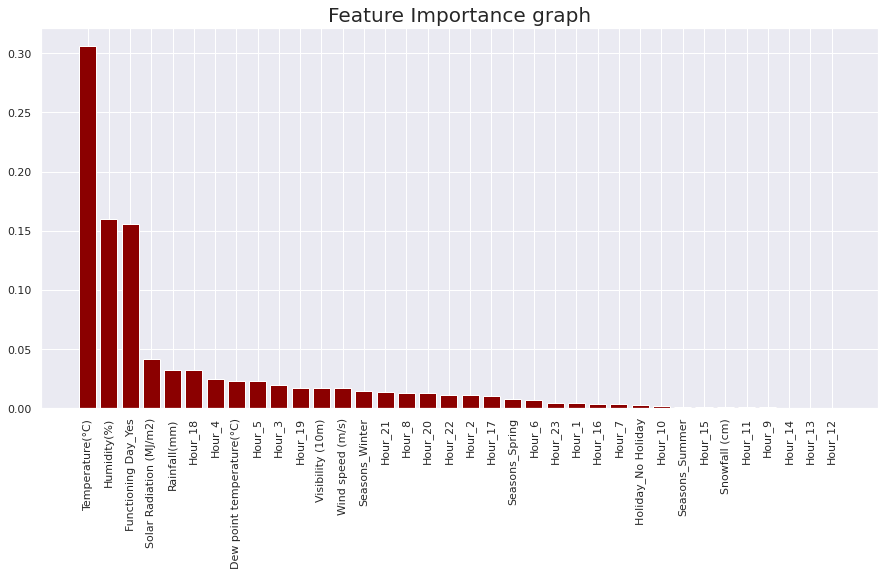

In [138]:
# Visualization of feature importance
plt.figure(figsize = (15,7))
sns.set(font_scale = 1)
plt.bar(feat_impt['Columns'],feat_impt['Feature_importance_value'],color ='darkred')
plt.title('Feature Importance graph',fontsize = 20)
plt.xticks(rotation=90)

In [69]:
# Model Performance

In [70]:
model = ['Linear_Regressor','Polynomial_Regressor','Lasso_Regressor','Ridge_Regressor','DesicionTree_Regressor','RandomForest_Regressor','GradientBoost_Regressor']

model_R2_Train = [r2_score(y_train, y_pred_train)*100,
                  r2_score(y_train,y_train_poly_predicted)*100,
                  r2_score(y_train,y_train_lasso_cv_pred)*100,
                  r2_score(y_train,y_train_ridge_cv_pred)*100,
                  r2_score(y_train_dt,y_train_pred_dec_reg)*100,
                  r2_score(y_train_dt,y_train_rfr_cv_pred)*100,
                  r2_score(y_train_dt,y_train_gbr_cv_pred)*100]

model_R2_Test = [r2_score(y_test, y_pred_test)*100,
                 r2_score(y_test, y_test_poly_predict)*100,
                 r2_score(y_test, y_test_lasso_cv_pred)*100,
                 r2_score(y_test, y_test_ridge_cv_pred)*100,
                 r2_score(y_test_dt,y_test_pred_dec_reg)*100,
                 r2_score(y_test_dt,y_test_rfr_cv_pred)*100,
                 r2_score(y_test_dt,y_test_gbr_cv_pred)*100]

model_adjR2_Test = [(1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100,
                    (1-(1-r2_score(y_test, y_test_poly_predict))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100,
                    (1-(1-r2_score(y_test, y_test_lasso_cv_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100,
                    (1-(1-r2_score(y_test, y_test_ridge_cv_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100,
                    (1-(1-r2_score(y_test_dt, y_test_pred_dec_reg))*((X_test_dt.shape[0]-1)/(X_test_dt.shape[0]-X_test_dt.shape[1]-1)))*100,
                    (1-(1-r2_score(y_test_dt, y_test_rfr_cv_pred))*((X_test_dt.shape[0]-1)/(X_test_dt.shape[0]-X_test_dt.shape[1]-1)))*100,
                    (1-(1-r2_score(y_test_dt, y_test_gbr_cv_pred))*((X_test_dt.shape[0]-1)/(X_test_dt.shape[0]-X_test_dt.shape[1]-1)))*100]

model_RMSE = [mean_squared_error(y_test, y_pred_test),
              mean_squared_error(y_test, y_test_poly_predict),
              mean_squared_error(y_test, y_test_lasso_cv_pred),
              mean_squared_error(y_test, y_test_ridge_cv_pred),
              mean_squared_error(y_test_dt, y_test_pred_dec_reg),
              mean_squared_error(y_test_dt, y_test_rfr_cv_pred),
              mean_squared_error(y_test_dt, y_test_gbr_cv_pred)]

In [71]:
Model_perform = pd.DataFrame({'Models': model,'Train r2_score':model_R2_Train,'Test r2_score':model_R2_Test,'Test Adj r2_score':model_adjR2_Test,'Test RMSE':model_RMSE})
Model_perform.set_index('Models',inplace = True)

In [72]:
Model_perform

,Train r2_score,Test r2_score,Test Adj r2_score,Test RMSE
Models,,,,
Linear_Regressor,66.415399,67.018017,66.482098,133073.103740
Polynomial_Regressor,84.660787,82.518188,82.234129,70534.235420
Lasso_Regressor,84.551705,82.552085,82.268576,70397.471800
Ridge_Regressor,83.275720,82.293161,82.005445,71442.157446
DesicionTree_Regressor,100.000000,77.605141,77.338975,34.453298
RandomForest_Regressor,89.807124,86.896180,86.740440,20.159528
GradientBoost_Regressor,86.269795,84.491204,84.306881,23.859456


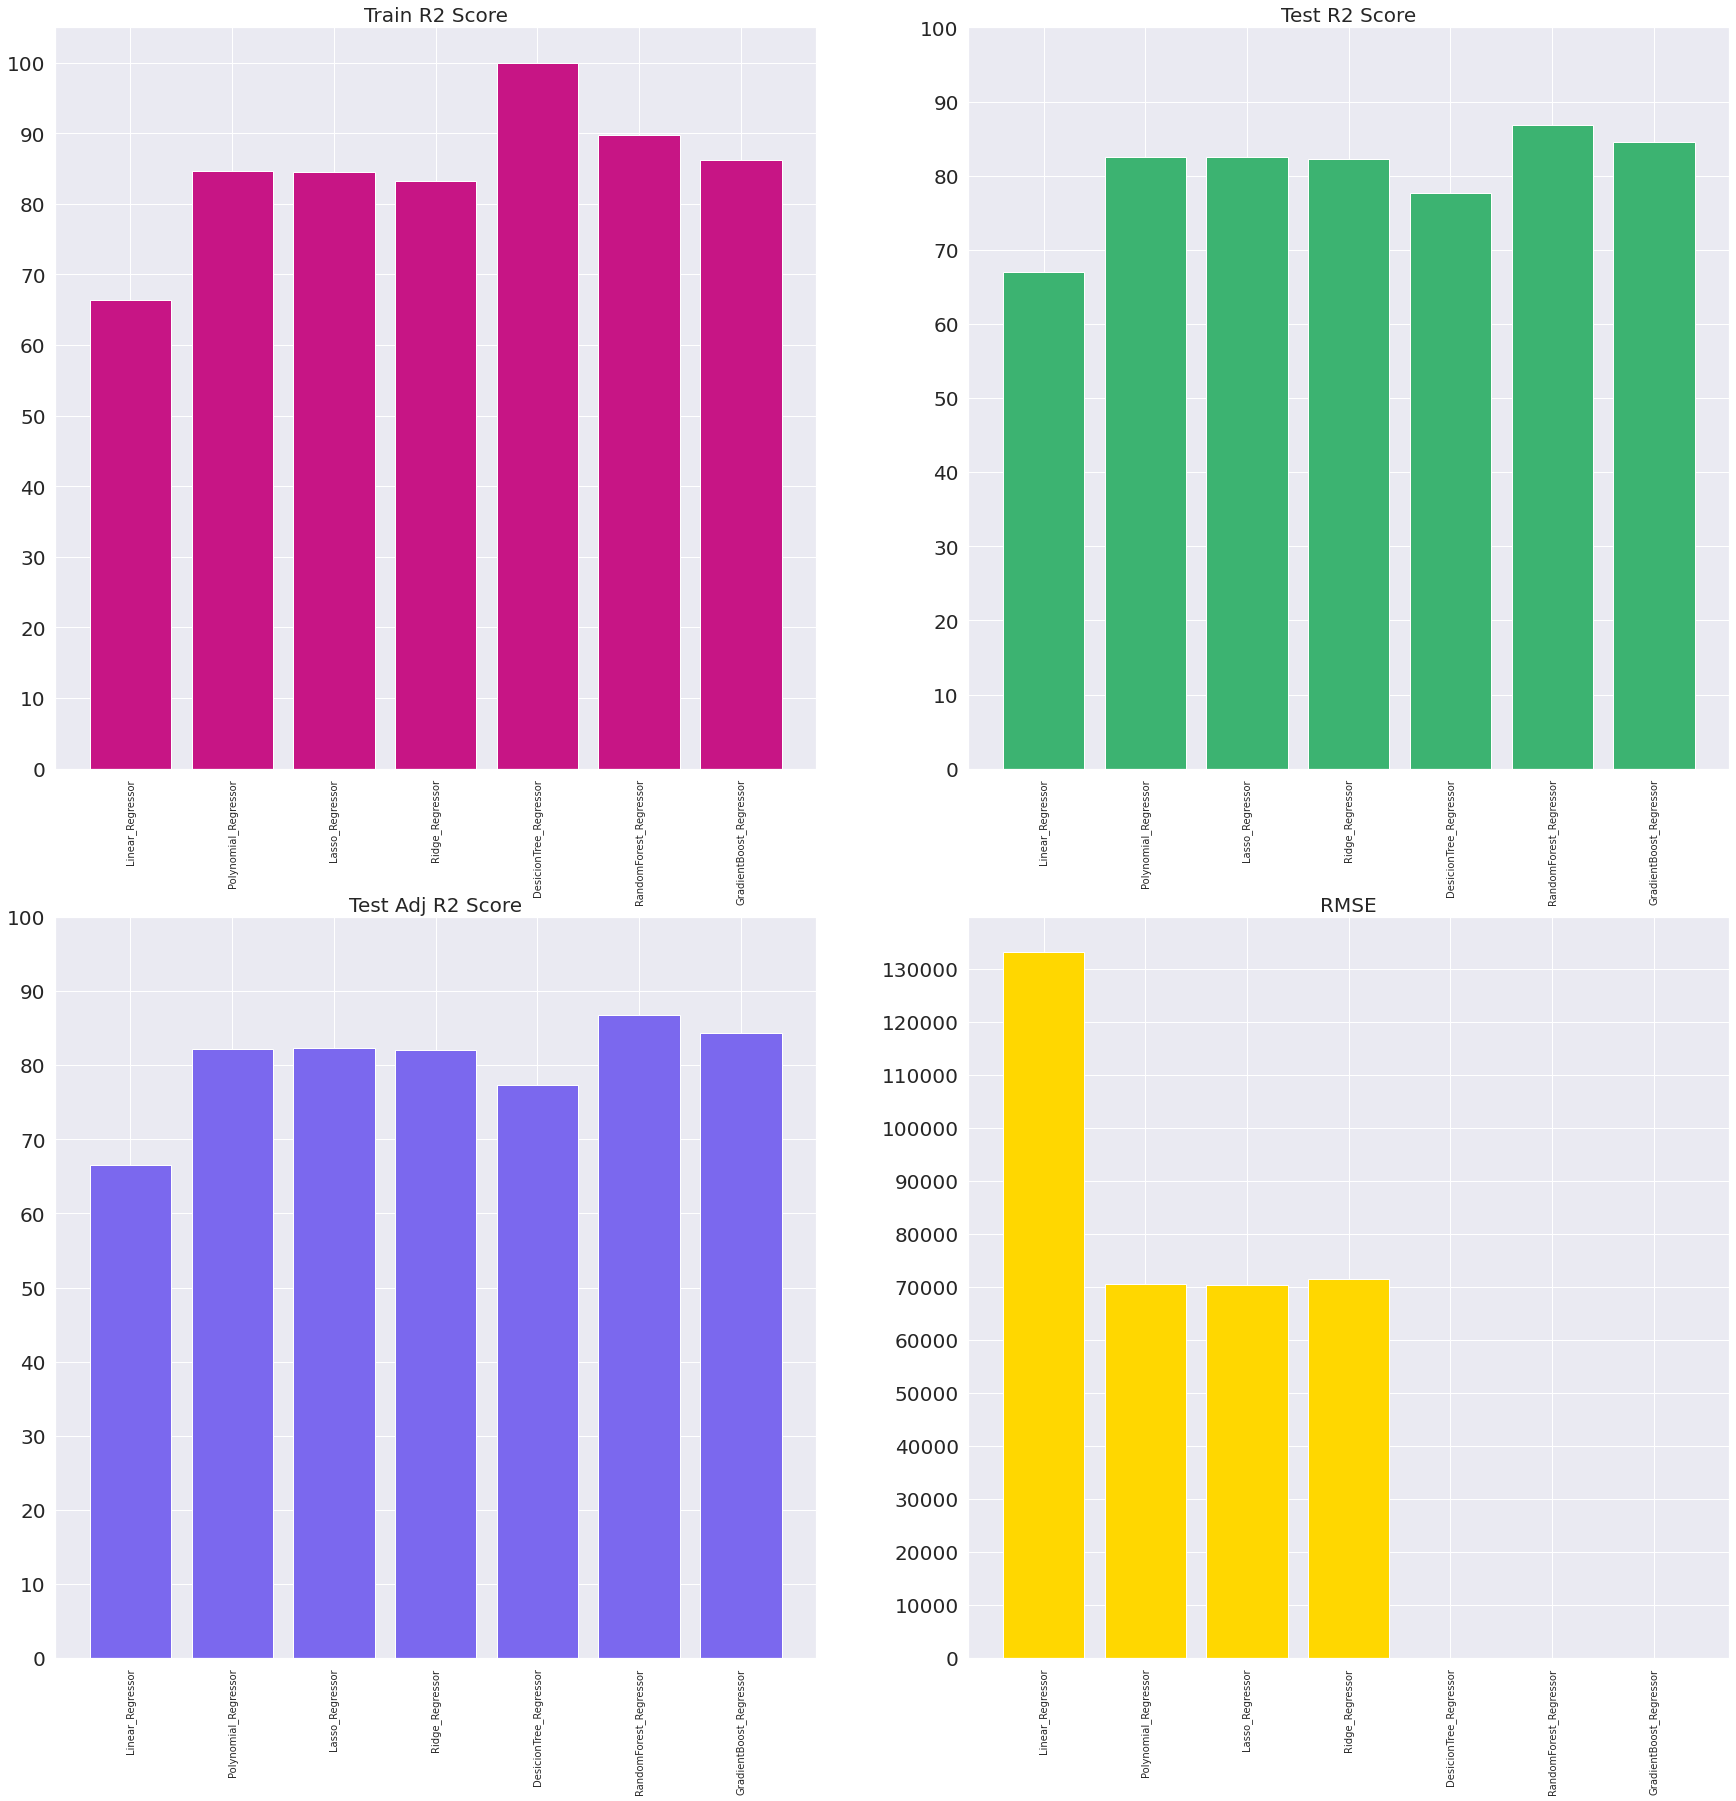

In [132]:
# Visualization of model scores
lst = [model_R2_Train,model_R2_Test,model_adjR2_Test,model_RMSE]
colors = ['mediumvioletred','mediumseagreen','mediumslateblue','gold']
title = ['Train R2 Score','Test R2 Score','Test Adj R2 Score','RMSE']
plt.figure(figsize = (30,30))
sns.set_theme()
for i in enumerate(lst):
  plt.subplot(2, 2,i[0]+1)
  plt.bar(model,i[1],color = colors[i[0]])
  plt.xticks(rotation = 90,fontsize = 10)
  if i[1] == model_RMSE:
    plt.yticks(list(range(0,140000,10000)),fontsize = 20)
  else:
    plt.yticks(list(range(0,101,10)),fontsize = 20)
  plt.title(title[i[0]],fontsize = 20)